# Top 5 Tech Cities worth Investing

**Authors**: Alice Agrawal, Jordan Kominsky, Kyongmin So, Tyler Wood, Hanis Zulmuthi

***May 2022***

## Overview

Real estate has always been one of the most dependable markets when looking for consistent, yet high returns. Even after the housing crash of 2008, it only took a few years for the market to return to previous highs, and it has maintained steady growth ever since. This has been especially true in markets with high incomes and high density such as San Franciso or New York. Tech jobs are also gaining prominence in the job market and acquiring real estate that could serve these migrating employees could give us a competitive edge.

## Business Understanding

Tech is becoming a larger part of both the US and the Global economy every year. As tech grows in a city, it doesn't only bring tech jobs, it also brings other facets of culture. In the main tech hubs of America, you'll find much more than just the industrious culture of modern technology; there will be growth in art exhibits, breweries, parks, and many other places where people can share experiences. These traits make tech cities desirable places of residence not only for those in technology, but also anyone who values being in a place that is culturally engaging. 

As time goes on, less people are deciding to stay in their small towns and are moving to larger cities instead. We can see a chart from business insider that portrays the shrinking of rural America [here](https://www.businessinsider.com/us-census-map-widespread-population-declines-in-rural-areas-2021-8). Furthermore, when we look at the growth of cities, we find that the largest cities are growing at the fastest rate. This article from the [Brookings Institute](https://www.brookings.edu/blog/the-avenue/2017/10/17/big-cities-small-cities-and-the-gaps/) mentions this phenomenon. 

A large proportion of this growth will most likely be seen in these emerging tech hubs due to their wide cultural and employment appeal. We selected 10 cities to analyze in America that we think hold promise as places of high growth. We decided on these 10  due to an [Indeed article](https://www.indeed.com/career-advice/finding-a-job/top-cities-for-tech-jobs-2020) that asserted these cities as places of high prominence in the tech industry. Specifically, these cities were Washington D.C., New York City, Seattle, San Francisco, Los Angeles, San Jose, Dallas, Boston, Chicago, and Baltimore. Many of these places have expensive markets already, but there is no shortage of demand for housing in any of these cities. As the tech sector continues to grow, there will be an even greater need to develop housing. The political landscape is starting to warm up to higher density developments such as multiplexes, which will allow for new housing development opportunities in these markets that have previously been unprofitable. Focusing on these high growth areas will provide us an advantage over the competition that is more cautious to invest in these markets with higher upfront investment barriers.

## Data Understanding

### Home Price
**Source**: 

**Contents**: 

### 2017 Median Income
**Source**: 

**Contents**:

# Data Cleaning & Preparation

## Import packages

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#modeling
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

#warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

## Load home price data

In [2]:
df = pd.read_csv('Data/zillow_data.csv')
df

RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0           Cook         1  334200.0  335400.0  336500.0  ...  1005500   
1         Collin         2  235700.0  236900.0  236700.0  ...   308000   
2         Harris         3  210400.0  212200.0  212200.0  ...   321000   
3           Cook         4  498100.0  500900.0  503100.0  ...  1289800   
4        El Paso         5   77300.0   77300.0   77300.0  ...   119100   
...          ...       ...       ...       ...       ...  ...      ...   
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
0      1007500  1007800  1009600  1013300  1018700  1024400  1030700  1033800   
1       310000   312500   314100   315000   316600   318100   319600   321100   
2       320600   320200   320400   320800   321200   321200   323000   326900   
3      1287700  1287400  1291500  1296600  1299000  1302700  1306400  1308500   
4       119400   120000   120300   120300   120300   120300   120500   121000   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
0      1030600  
1       321800  
2       329900  
3      1307000  
4       121500  
...        ...  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[14723 rows x 272 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
df.columns[:100]

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02',
       '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08',
       '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02',
       '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08',
       '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02',
       '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08',
       '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02',
       '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08',
       '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02',
       '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08',
       '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02',
       '2002-03', '2002-04', '2002-05', '2002-06',

Since there are a lot of cities of the same name in multiple states, let's create a column that identifies the cities from the state unique by specifying which state the city belongs to.

In [5]:
#Combine city and state
df['Geolocate'] = df['City'] + ', ' + df['State']


In [6]:
# Sniff test
df[df.Geolocate == 'Washington, DC']

RegionID  RegionName        City State       Metro  \
29       66126       20002  Washington    DC  Washington   
33       66133       20009  Washington    DC  Washington   
181      66135       20011  Washington    DC  Washington   
246      66142       20019  Washington    DC  Washington   
258      66125       20001  Washington    DC  Washington   
402      66143       20020  Washington    DC  Washington   
1263     66132       20008  Washington    DC  Washington   
1448     66127       20003  Washington    DC  Washington   
1707     66151       20032  Washington    DC  Washington   
2066     66139       20016  Washington    DC  Washington   
2581     66134       20010  Washington    DC  Washington   
2653     66131       20007  Washington    DC  Washington   
5297     66146       20024  Washington    DC  Washington   
5339     66140       20017  Washington    DC  Washington   
5453     66141       20018  Washington    DC  Washington   
5805     66155       20037  Washington    DC  Washington   
6484     66138       20015  Washington    DC  Washington   
6887     66136       20012  Washington    DC  Washington   

                CountyName  SizeRank   1996-04   1996-05   1996-06  ...  \
29    District of Columbia        30   94300.0   94000.0   93700.0  ...   
33    District of Columbia        34  178800.0  179200.0  179600.0  ...   
181   District of Columbia       182  118900.0  118500.0  118200.0  ...   
246   District of Columbia       247   91300.0   91000.0   90600.0  ...   
258   District of Columbia       259   92000.0   92600.0   93200.0  ...   
402   District of Columbia       403  104500.0  103800.0  103000.0  ...   
1263  District of Columbia      1264  450100.0  448200.0  446300.0  ...   
1448  District of Columbia      1449  130000.0  130100.0  130200.0  ...   
1707  District of Columbia      1708   85700.0   85500.0   85400.0  ...   
2066  District of Columbia      2067  362000.0  361200.0  360300.0  ...   
2581  District of Columbia      2582  110500.0  111200.0  112000.0  ...   
2653  District of Columbia      2654  358100.0  356000.0  353900.0  ...   
5297  District of Columbia      5298  209800.0  208200.0  206600.0  ...   
5339  District of Columbia      5340  121700.0  121400.0  121200.0  ...   
5453  District of Columbia      5454  123000.0  122400.0  121800.0  ...   
5805  District of Columbia      5806  277800.0  275800.0  273700.0  ...   
6484  District of Columbia      6485  312400.0  311000.0  309800.0  ...   
6887  District of Columbia      6888  185000.0  184900.0  184700.0  ...   

      2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
29     668000   672200   673100   674600   678200   680900   683000   687500   
33    1027500  1034300  1040500  1047400  1055400  1065900  1076400  1081000   
181    586200   591200   593200   591200   589500   590800   599100   611400   
246    296300   302500   306700   308800   310800   313400   314100   311800   
258    768800   771200   773300   777600   780500   781600   785500   791400   
402    317600   321800   324500   324800   324900   324900   327300   332800   
1263  1508800  1509700  1506000  1509100  1514300  1519400  1527900  1539600   
1448   807200   811900   813400   814600   814600   815300   817300   820200   
1707   293400   297800   301500   303700   304000   304600   306800   308200   
2066  1198700  1196400  1190400  1184800  1183600  1186600  1190000  1196000   
2581   741700   750900   756300   759300   761800   763500   767800   774700   
2653  1330800  1324900  1314100  1303500  1296500  1293000  1291200  1291000   
5297   866900   860100   864500   874100   878200   882300   885500   886900   
5339   534300   535300   535600   532600   531000   534400   542300   548400   
5453   535200   534700   533100   534500   538700   542200   548300   553800   
5805   914900   918700   923400   938900   953100   967600   990100  1013500   
6484  1004000  1005300  1003700  1002900  1003600  1004400  1006400  1007200   

### Mask data to cities of interest

We're interested in looking at the housing market of major [tech cities](https://www.indeed.com/career-advice/finding-a-job/top-cities-for-tech-jobs-2020) in the US. Let's filter our data to these cities.

In [7]:
city_list = ['Washington, DC','New York, NY','San Francisco, CA','Seattle, WA',\
             'Dallas, TX','Los Angeles, CA','San Jose, CA','Chicago, IL','Baltimore, MD','Boston, MA']

In [8]:
df_cities = df[df.Geolocate.isin(city_list)]
df_cities.head()

RegionID  RegionName           City State          Metro     CountyName  \
0     84654       60657        Chicago    IL        Chicago           Cook   
3     84616       60614        Chicago    IL        Chicago           Cook   
6     61807       10467       New York    NY       New York          Bronx   
7     84640       60640        Chicago    IL        Chicago           Cook   
9     97564       94109  San Francisco    CA  San Francisco  San Francisco   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-08  2017-09  2017-10  \
0         1  334200.0  335400.0  336500.0  ...  1007500  1007800  1009600   
3         4  498100.0  500900.0  503100.0  ...  1287700  1287400  1291500   
6         7  152900.0  152700.0  152600.0  ...   400000   407300   411600   
7         8  216500.0  216700.0  216900.0  ...   787100   776100   774900   
9        10  766000.0  771100.0  776500.0  ...  3763900  3775000  3799700   

   2017-11  2017-12  2018-01  2018-02  2018-03  2018-04          Geolocate  
0  1013300  1018700  1024400  1030700  1033800  1030600        Chicago, IL  
3  1296600  1299000  1302700  1306400  1308500  1307000        Chicago, IL  
6   413200   414300   413900   411400   413200   417900       New York, NY  
7   777900   777900   778500   780500   782800   782800        Chicago, IL  
9  3793900  3778700  3770800  3763100  3779800  3813500  San Francisco, CA  

[5 rows x 273 columns]

## Pull 2017 Median Income data

Let's take a look at the median income at these major tech cities. For this, we'll be pulling 2017 median income data from [Kaggle](https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations?select=Income_Methodology.pdf).

In [9]:
#Load data
df_income = pd.read_csv('Data/kaggle_income.csv',
                       encoding = 'ISO-8859-1')

#Combine city and state
df_income['Geolocate'] = df_income['City'] + ', ' + df_income['State_ab']

#Mask dataframe to cities of interest
df_income = df_income[df_income.Geolocate.isin(city_list)]
df_income

id  State_Code  State_Name State_ab              County  \
1735    6013318           6  California       CA  Los Angeles County   
2012   60212459           6  California       CA      Alameda County   
2013   60212469           6  California       CA      Alameda County   
2014   60212479           6  California       CA      Alameda County   
2015   60212489           6  California       CA      Alameda County   
...         ...         ...         ...      ...                 ...   
30867   5302409          53  Washington       WA        Adams County   
30878   5302419          53  Washington       WA        Adams County   
30889   5302429          53  Washington       WA        Adams County   
31011   5302539          53  Washington       WA        Adams County   
31114   5302699          53  Washington       WA        Adams County   

              City         Place   Type Primary  Zip_Code Area_Code    ALand  \
1735   Los Angeles      Westmont    CDP   place     90047       323  4785352   
2012   Los Angeles  Alameda city  Track   Track     90041       323  4107036   
2013   Los Angeles  Alameda city  Track   Track     90041       323  1094425   
2014   Los Angeles  Alameda city  Track   Track     90042       323   535234   
2015   Los Angeles  Alameda city  Track   Track     90042       323   485332   
...            ...           ...    ...     ...       ...       ...      ...   
30867      Seattle        Hatton  Track   Track     98118       206  2783287   
30878      Seattle        Hatton  Track   Track     98108       206  1070775   
30889      Seattle        Hatton  Track   Track     98118       206  3506716   
31011      Seattle        Hatton  Track   Track     98126       206  1160397   
31114      Seattle        Hatton  Track   Track     98146       206        0   

          AWater        Lat         Lon    Mean  Median  Stdev        sum_w  \
1735           0  33.941679 -118.301838   39928   26090  41109  7649.302158   
2012       30513  34.145267 -118.204386   88527   59408  72801   206.020316   
2013           0  34.134781 -118.192851  106443   86878  81571   170.322969   
2014           0  34.119972 -118.189286   56625   49009  36976   270.156337   
2015           0  34.121666 -118.209226   65014   46199  60243   273.520535   
...          ...        ...         ...     ...     ...    ...          ...   
30867    1396979  47.555977 -122.265750   99369   85368  65621   780.283702   
30878          0  47.538359 -122.286204   47899   28094  51251  1143.971756   
30889          0  47.520170 -122.282850   69658   60039  54538   930.085090   
31011          0  47.512846 -122.363268   74622   65411  47653   430.775298   
31114  239607761  47.510648 -122.415421       0       0      0     0.000000   

             Geolocate  
1735   Los Angeles, CA  
2012   Los Angeles, CA  
2013   Los Angeles, CA  
2014   Los Angeles, CA  
2015   Los Angeles, CA  
...                ...  
30867      Seattle, WA  
30878      Seattle, WA  
30889      Seattle, WA  
31011      Seattle, WA  
31114      Seattle, WA  

[1227 rows x 20 columns]

<AxesSubplot:xlabel='Median', ylabel='Count'>

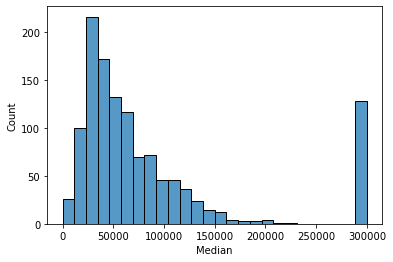

In [10]:
#Look at distribution of 2017 median income 

sns.histplot(df_income['Median'])

In [11]:
df_income.describe()

id   State_Code      Zip_Code         ALand        AWater  \
count  1.227000e+03  1227.000000   1227.000000  1.227000e+03  1.227000e+03   
mean   6.428769e+07    21.402608  60256.520782  1.881765e+06  3.313473e+05   
std    1.032249e+08    15.223327  31795.355730  1.750294e+07  6.917771e+06   
min    1.101200e+04     6.000000   2111.000000  0.000000e+00  0.000000e+00   
25%    1.702394e+07     6.000000  21221.000000  3.307440e+05  0.000000e+00   
50%    2.402528e+07    17.000000  60647.000000  6.745220e+05  0.000000e+00   
75%    6.021341e+07    36.000000  90034.000000  1.337892e+06  0.000000e+00   
max    4.802131e+08    53.000000  98199.000000  5.888084e+08  2.396078e+08   

               Lat          Lon           Mean         Median          Stdev  \
count  1227.000000  1227.000000    1227.000000    1227.000000    1227.000000   
mean     38.731672   -96.637755   74328.420538   83886.340668   53879.555012   
std       3.876569    18.901290   38142.665762   81792.355697   20528.416491   
min      29.659982  -122.510436       0.000000       0.000000       0.000000   
25%      34.088205  -118.304154   43791.500000   32824.000000   37546.500000   
50%      39.302056   -87.733943   65069.000000   54857.000000   53365.000000   
75%      41.781700   -76.955035   98983.500000   95948.000000   71082.500000   
max      47.730188   -71.054128  206380.000000  300000.000000  103836.000000   

               sum_w  
count    1227.000000  
mean     1051.350246  
std     17852.654704  
min         0.000000  
25%       194.785034  
50%       314.086381  
75%       566.773104  
max    612241.922964

In [12]:
df_income['Median'].median()

54857.0

The distribution of the median income in the major tech cities is skewed to left. Interesting that the median of the 2017 median income is ~$55000. I expected the median of median income in the major tech cities to be higher.

There also seemed to be a lot of erroneous median income values equal to exactly $300,000 for many cities, so I removed those.

In [13]:
# Remove rows with median income is $300000
df_income = df_income[df_income['Median'] != 300000]
df_income

id  State_Code  State_Name State_ab              County  \
1735    6013318           6  California       CA  Los Angeles County   
2012   60212459           6  California       CA      Alameda County   
2013   60212469           6  California       CA      Alameda County   
2014   60212479           6  California       CA      Alameda County   
2015   60212489           6  California       CA      Alameda County   
...         ...         ...         ...      ...                 ...   
30867   5302409          53  Washington       WA        Adams County   
30878   5302419          53  Washington       WA        Adams County   
30889   5302429          53  Washington       WA        Adams County   
31011   5302539          53  Washington       WA        Adams County   
31114   5302699          53  Washington       WA        Adams County   

              City         Place   Type Primary  Zip_Code Area_Code    ALand  \
1735   Los Angeles      Westmont    CDP   place     90047       323  4785352   
2012   Los Angeles  Alameda city  Track   Track     90041       323  4107036   
2013   Los Angeles  Alameda city  Track   Track     90041       323  1094425   
2014   Los Angeles  Alameda city  Track   Track     90042       323   535234   
2015   Los Angeles  Alameda city  Track   Track     90042       323   485332   
...            ...           ...    ...     ...       ...       ...      ...   
30867      Seattle        Hatton  Track   Track     98118       206  2783287   
30878      Seattle        Hatton  Track   Track     98108       206  1070775   
30889      Seattle        Hatton  Track   Track     98118       206  3506716   
31011      Seattle        Hatton  Track   Track     98126       206  1160397   
31114      Seattle        Hatton  Track   Track     98146       206        0   

          AWater        Lat         Lon    Mean  Median  Stdev        sum_w  \
1735           0  33.941679 -118.301838   39928   26090  41109  7649.302158   
2012       30513  34.145267 -118.204386   88527   59408  72801   206.020316   
2013           0  34.134781 -118.192851  106443   86878  81571   170.322969   
2014           0  34.119972 -118.189286   56625   49009  36976   270.156337   
2015           0  34.121666 -118.209226   65014   46199  60243   273.520535   
...          ...        ...         ...     ...     ...    ...          ...   
30867    1396979  47.555977 -122.265750   99369   85368  65621   780.283702   
30878          0  47.538359 -122.286204   47899   28094  51251  1143.971756   
30889          0  47.520170 -122.282850   69658   60039  54538   930.085090   
31011          0  47.512846 -122.363268   74622   65411  47653   430.775298   
31114  239607761  47.510648 -122.415421       0       0      0     0.000000   

             Geolocate  
1735   Los Angeles, CA  
2012   Los Angeles, CA  
2013   Los Angeles, CA  
2014   Los Angeles, CA  
2015   Los Angeles, CA  
...                ...  
30867      Seattle, WA  
30878      Seattle, WA  
30889      Seattle, WA  
31011      Seattle, WA  
31114      Seattle, WA  

[1099 rows x 20 columns]

In [14]:
#Group by cities and aggregate the values.
df_income = df_income.groupby(['Geolocate']).agg({'Mean': 'mean',
                                                  'Median': 'mean',
                                                  'Stdev': 'mean'}).reset_index()
df_income[['Mean', 'Median', 'Stdev']] = df_income[['Mean', 'Median', 'Stdev']].astype('int')

# Rename columns
df_income = df_income.rename(columns = {'Mean':'Mean_2017income','Median':'Median_2017income','Stdev':'Stdev_2017income'})
df_income

Geolocate  Mean_2017income  Median_2017income  Stdev_2017income
0      Baltimore, MD            61988              52809             45595
1         Boston, MA            79133              59771             67582
2        Chicago, IL            62931              50270             49391
3         Dallas, TX            64670              55128             46893
4    Los Angeles, CA            57342              45533             46291
5       New York, NY            84977              73823             61328
6  San Francisco, CA            98358              83966             72248
7       San Jose, CA            93131              83024             61203
8        Seattle, WA            79901              66187             57554
9     Washington, DC            85698              73142             62392

Let's pull out the median home price for 2017 in these cities to analyze against the 2017 median income.

In [15]:
#Pull out 2017 home price
home_price_2017 = df_cities.groupby('Geolocate').median()
home_price_2017 = home_price_2017[['2017-12']]
home_price_2017 = home_price_2017.reset_index()
home_price_2017

Geolocate    2017-12
0      Baltimore, MD   160450.0
1         Boston, MA   551200.0
2        Chicago, IL   355200.0
3         Dallas, TX   326700.0
4    Los Angeles, CA   730500.0
5       New York, NY   727350.0
6  San Francisco, CA  1704500.0
7       San Jose, CA  1077100.0
8        Seattle, WA   827100.0
9     Washington, DC   771150.0

In [16]:
# Merge dataframes containing 2017 median income and 2017 median house price.

city_df = df_income.merge(home_price_2017)
city_df = city_df.rename(columns = {'2017-12':'Median_house_price_2017'})
city_df ['Income/Home Ration'] = city_df['Median_house_price_2017']/city_df['Median_2017income']
city_df

Geolocate  Mean_2017income  Median_2017income  Stdev_2017income  \
0      Baltimore, MD            61988              52809             45595   
1         Boston, MA            79133              59771             67582   
2        Chicago, IL            62931              50270             49391   
3         Dallas, TX            64670              55128             46893   
4    Los Angeles, CA            57342              45533             46291   
5       New York, NY            84977              73823             61328   
6  San Francisco, CA            98358              83966             72248   
7       San Jose, CA            93131              83024             61203   
8        Seattle, WA            79901              66187             57554   
9     Washington, DC            85698              73142             62392   

   Median_house_price_2017  Income/Home Ration  
0                 160450.0            3.038308  
1                 551200.0            9.221863  
2                 355200.0            7.065844  
3                 326700.0            5.926208  
4                 730500.0           16.043309  
5                 727350.0            9.852620  
6                1704500.0           20.299883  
7                1077100.0           12.973357  
8                 827100.0           12.496412  
9                 771150.0           10.543190

#### Plotting all our dataframe

In [17]:
fig = px.scatter(city_df, x = 'Median_house_price_2017',
                 y = 'Median_2017income',
                 text="Geolocate", color = 'Median_house_price_2017', size='Income/Home Ration',
                 size_max=25,
                 color_continuous_scale = 'Bluered', hover_name = 'Geolocate',
                 hover_data = {'Median_2017income': ':$,2f',
                               'Median_house_price_2017': ':$,2f'},
                labels={"Median_house_price_2017": "2017 Median Home price", "Median_2017income": "2017 Median Income"},
                width=1600, height=800)

fig.update_traces(textposition=["top center", "top right", "top right","top right",
                  "top right", "top right", "middle left", "top center", "top right", "middle right"])

fig.update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)",
                   "paper_bgcolor": "rgba(0, 0, 0, 0)"},
                  title_text = 'Median Household Income vs. Median Home Price ($USD) in the United States',
                  title_font_size = 18,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  showlegend = False,
                  hovermode = 'closest',
                  template = 'xgridoff')

## Time Series Data

### Prep time series data

Transforming the data from wide form to long form using a custom function.

In [18]:
# This function is provided with the starter notebook:
def melt_data(df,city):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','Geolocate'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted_df= melted.groupby('time').aggregate({'value':'median'})
    melted_df.rename(columns = {'value':city}, inplace = True)
    return melted_df

In [19]:
melted_df = pd.DataFrame()
for city in city_list:
    city_df = df[df['Geolocate'] == city]
    city_melt = melt_data(city_df,city)
    if len(melted_df) == 0:
        melted_df = city_melt
    else:
        melted_df=melted_df.join(city_melt)
melted_df

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-04-01        126500.0      175950.0           306900.0     170600.0   
1996-05-01        126250.0      175650.0           307600.0     171000.0   
1996-06-01        126000.0      175800.0           308400.0     171600.0   
1996-07-01        125800.0      175150.0           309300.0     172200.0   
1996-08-01        125750.0      174400.0           310500.0     173000.0   
1996-09-01        125900.0      174000.0           312000.0     173800.0   
1996-10-01        126250.0      174050.0           313700.0     174800.0   
1996-11-01        126650.0      173850.0           315600.0     176000.0   
1996-12-01        127300.0      174000.0           318100.0     177400.0   
1997-01-01        128050.0      174150.0           321000.0     179000.0   
1997-02-01        128800.0      174200.0           323900.0     180600.0   
1997-03-01        129500.0      174500.0           326600.0     182000.0   
1997-04-01        130200.0      174950.0           329600.0     183600.0   
1997-05-01        131050.0      175550.0           332600.0     185100.0   
1997-06-01        131900.0      176400.0           335800.0     186700.0   
1997-07-01        132650.0      177100.0           339200.0     188300.0   
1997-08-01        133350.0      177900.0           342700.0     190000.0   
1997-09-01        134000.0      178800.0           346400.0     192800.0   
1997-10-01        134800.0      179800.0           350400.0     196000.0   
1997-11-01        135700.0      181000.0           354500.0     199400.0   
1997-12-01        136650.0      181850.0           359100.0     203100.0   
1998-01-01        137600.0      182850.0           364200.0     206900.0   
1998-02-01        138500.0      183700.0           369300.0     210600.0   
1998-03-01        139150.0      184350.0           374100.0     214100.0   
1998-04-01        139950.0      185050.0           379100.0     217600.0   
1998-05-01        140750.0      185650.0           384000.0     221000.0   
1998-06-01        141700.0      186350.0           388900.0     224300.0   
1998-07-01        142650.0      187100.0           393700.0     227500.0   
1998-08-01        143650.0      187950.0           398300.0     230700.0   
1998-09-01        144750.0      189400.0           402600.0     233800.0   
1998-10-01        145950.0      190500.0           406800.0     236900.0   
1998-11-01        147250.0      191950.0           410900.0     240000.0   
1998-12-01        148800.0      193650.0           415400.0     243100.0   
1999-01-01        150500.0      195350.0           420200.0     246300.0   
1999-02-01        152150.0      196950.0           425100.0     249200.0   
1999-03-01        153650.0      198450.0           430000.0     251900.0   
1999-04-01        155200.0      200000.0           435400.0     254500.0   
1999-05-01        156750.0      202000.0           441300.0     257100.0   
1999-06-01        158350.0      204250.0           447900.0     259700.0   
1999-07-01        159950.0      206500.0           455500.0     262300.0   
1999-08-01        161550.0      208850.0           463900.0     265000.0   
1999-09-01        163150.0      211200.0           473100.0     267300.0   
1999-10-01        164750.0      213650.0           483300.0     269600.0   
1999-11-01        166350.0      216150.0           494300.0     272200.0   
1999-12-01        168150.0      218900.0           506200.0     274900.0   
2000-01-01        170100.0      221800.0           518700.0     277700.0   
2000-02-01        171950.0      224700.0           530800.0     280500.0   
2000-03-01        173650.0      227550.0           542100.0     283100.0   
2000-04-01        175300.0      229750.0           552700.0     285600.0   
2000-05-01        176950.0      232650.0           562300.0     288000.0   
2000-06-01        178750.0      235600.0           570800.0 

In [20]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Washington, DC     265 non-null    float64
 1   New York, NY       265 non-null    float64
 2   San Francisco, CA  265 non-null    float64
 3   Seattle, WA        265 non-null    float64
 4   Dallas, TX         265 non-null    float64
 5   Los Angeles, CA    265 non-null    float64
 6   San Jose, CA       265 non-null    float64
 7   Chicago, IL        265 non-null    float64
 8   Baltimore, MD      265 non-null    float64
 9   Boston, MA         265 non-null    float64
dtypes: float64(10)
memory usage: 32.8 KB


Resample data to yearly. 

In [21]:
resampled_year = melted_df.resample('A').median()
resampled_year

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-12-31        126250.0      174400.0           310500.0     173000.0   
1997-12-31        132275.0      176750.0           337500.0     187500.0   
1998-12-31        142175.0      186725.0           391300.0     225900.0   
1999-12-31        159150.0      205375.0           451700.0     261000.0   
2000-12-31        179700.0      237050.0           575200.0     291600.0   
2001-12-31        220050.0      268150.0           629200.0     310200.0   
2002-12-31        273600.0      293100.0           638850.0     326600.0   
2003-12-31        317125.0      344775.0           687300.0     339400.0   
2004-12-31        398425.0      400200.0           813500.0     378200.0   
2005-12-31        492725.0      484375.0           901050.0     437200.0   
2006-12-31        511175.0      557325.0           897400.0     498550.0   
2007-12-31        515350.0      552500.0           939000.0     522700.0   
2008-12-31        489050.0      518725.0           923300.0     496350.0   
2009-12-31        454425.0      476325.0           809800.0     435500.0   
2010-12-31        452600.0      475025.0           834300.0     426500.0   
2011-12-31        437225.0      468475.0           818100.0     394700.0   
2012-12-31        465225.0      449850.0           869750.0     418050.0   
2013-12-31        517325.0      491750.0          1046750.0     473800.0   
2014-12-31        605500.0      529000.0          1249550.0     500300.0   
2015-12-31        662300.0      576425.0          1401950.0     569100.0   
2016-12-31        709500.0      626300.0          1473450.0     678150.0   
2017-12-31        746750.0      691275.0          1585300.0     785300.0   
2018-12-31        779850.0      741650.0          1747750.0     848300.0   

            Dallas, TX  Los Angeles, CA  San Jose, CA  Chicago, IL  \
time                                                                 
1996-12-31    167250.0         166000.0      238800.0     149050.0   
1997-12-31    169600.0         171400.0      262550.0     143150.0   
1998-12-31    171975.0         190700.0      305650.0     162000.0   
1999-12-31    169150.0         211700.0      344750.0     183200.0   
2000-12-31    175275.0         235750.0      446050.0     210575.0   
2001-12-31    179100.0         265250.0      472450.0     235875.0   
2002-12-31    183425.0         307150.0      478350.0     253950.0   
2003-12-31    183875.0         374500.0      491500.0     277575.0   
2004-12-31    192025.0         493700.0      565500.0     312575.0   
2005-12-31    200225.0         597800.0      688500.0     352875.0   
2006-12-31    206875.0         648500.0      707850.0     383000.0   
2007-12-31    213700.0         611800.0      710300.0     386825.0   
2008-12-31    210775.0         509200.0      628000.0     363950.0   
2009-12-31    215450.0         453750.0      530700.0     321375.0   
2010-12-31    218775.0         457000.0      544350.0     298700.0   
2011-12-31    212125.0         421850.0      522700.0     270125.0   
2012-12-31    216700.0         418750.0      548700.0     260200.0   
2013-12-31    224275.0         488800.0      659750.0     289450.0   
2014-12-31    222500.0         545450.0      718350.0     315100.0   
2015-12-31    254500.0         583900.0      821250.0     319850.0   
2016-12-31    277750.0         648950.0      894950.0     340100.0   
2017-12-31    318700.0         690250.0      955850.0     355350.0   
2018-12-31    332350.0         741750.0     1134150.0     356300.0   

            Baltimore, MD  Boston, MA  
time                                   
1996-12-31        58100.0    118200.0  
1997-12-31        59575.0    126900.0  
1998-12-31        61350.0    138050.0  
1999-12-31        65075.0    160950.0  
2000-12-31        71600.0    200500.0  
2001-12-31        77125.0    226650.0  
2002-12-31        82325.0    264700.0  


Resample data to quarterly.

In [22]:
resampled_quarter = melted_df.resample('Q').median()
resampled_quarter

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-06-30        126250.0      175800.0           307600.0     171000.0   
1996-09-30        125800.0      174400.0           310500.0     173000.0   
1996-12-31        126650.0      174000.0           315600.0     176000.0   
1997-03-31        128800.0      174200.0           323900.0     180600.0   
1997-06-30        131050.0      175550.0           332600.0     185100.0   
1997-09-30        133350.0      177900.0           342700.0     190000.0   
1997-12-31        135700.0      181000.0           354500.0     199400.0   
1998-03-31        138500.0      183700.0           369300.0     210600.0   
1998-06-30        140750.0      185650.0           384000.0     221000.0   
1998-09-30        143650.0      187950.0           398300.0     230700.0   
1998-12-31        147250.0      191950.0           410900.0     240000.0   
1999-03-31        152150.0      196950.0           425100.0     249200.0   
1999-06-30        156750.0      202000.0           441300.0     257100.0   
1999-09-30        161550.0      208850.0           463900.0     265000.0   
1999-12-31        166350.0      216150.0           494300.0     272200.0   
2000-03-31        171950.0      224700.0           530800.0     280500.0   
2000-06-30        176950.0      232650.0           562300.0     288000.0   
2000-09-30        182750.0      241250.0           588300.0     295100.0   
2000-12-31        190600.0      250900.0           609300.0     300200.0   
2001-03-31        201500.0      259000.0           623400.0     304700.0   
2001-06-30        213550.0      265350.0           630000.0     308600.0   
2001-09-30        226750.0      270800.0           633000.0     311300.0   
2001-12-31        241050.0      276300.0           628800.0     314000.0   
2002-03-31        255500.0      282800.0           628800.0     319500.0   
2002-06-30        268000.0      290000.0           636800.0     325000.0   
2002-09-30        277650.0      295950.0           646200.0     327900.0   
2002-12-31        285100.0      303200.0           665000.0     329500.0   
2003-03-31        292400.0      319700.0           677500.0     331100.0   
2003-06-30        305150.0      340300.0           686100.0     335900.0   
2003-09-30        330550.0      349100.0           690300.0     343000.0   
2003-12-31        353300.0      359400.0           710000.0     352600.0   
2004-03-31        368800.0      382000.0           747800.0     364100.0   
2004-06-30        387500.0      390700.0           791800.0     374000.0   
2004-09-30        409700.0      411000.0           832600.0     384800.0   
2004-12-31        436800.0      435700.0           861800.0     401600.0   
2005-03-31        466050.0      455050.0           883800.0     415500.0   
2005-06-30        485350.0      475550.0           898700.0     430300.0   
2005-09-30        497200.0      495900.0           901100.0     443900.0   
2005-12-31        502950.0      526050.0           923600.0     460900.0   
2006-03-31        508850.0      544150.0           932100.0     477000.0   
2006-06-30        512100.0      555900.0           909100.0     493800.0   
2006-09-30        511800.0      564400.0           886700.0     502400.0   
2006-12-31        510600.0      559800.0           874900.0     508000.0   
2007-03-31        513500.0      552600.0           883200.0     516300.0   
2007-06-30        516800.0      555050.0           920900.0     523100.0   
2007-09-30        516650.0      549850.0           951200.0     524600.0   
2007-12-31        511850.0      544450.0           952400.0     522300.0   
2008-03-31        502200.0      538150.0           943200.0     515300.0   
2008-06-30        492450.0      527100.0           933100.0     503000.0   
2008-09-30        485300.0      511200.0           909200.0     488000.0   
2008-12-31        475850.0      500050.0           879300.0 

### EDA Time series data

**Plot of monthly data from 1996 - 2018**

In [23]:
# Plot median house price time series for each City: 
fig = px.line(melted_df, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)",
                   "paper_bgcolor": "rgba(0, 0, 0, 0)"},
                  title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

**Plot quarterly data from 1996 - 2018**

In [24]:
# Plot median house price time series for each City: 
fig = px.line(resampled_quarter, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout(title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

**Plot of Yearly data from 1996-2018**

In [25]:
# Plot median house price time series for each City: 
fig = px.line(resampled_year, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout(title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

For the purpose of our business problem, using monthly data for the last 2 decades makes more sense because...

#### Return of investments by city

In [26]:
# Calculate return for each City: 
df_return = melted_df.pct_change()
df_return

# drop the first row of the df_return dataframe:
df_return.dropna(axis=0, inplace=True)

df_return.head()

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-05-01       -0.001976     -0.001705           0.002281     0.002345   
1996-06-01       -0.001980      0.000854           0.002601     0.003509   
1996-07-01       -0.001587     -0.003697           0.002918     0.003497   
1996-08-01       -0.000397     -0.004282           0.003880     0.004646   
1996-09-01        0.001193     -0.002294           0.004831     0.004624   

            Dallas, TX  Los Angeles, CA  San Jose, CA  Chicago, IL  \
time                                                                 
1996-05-01    0.005443         0.004834      0.002131    -0.000334   
1996-06-01    0.003609         0.003608      0.003403    -0.001670   
1996-07-01    0.001498        -0.002397      0.005935    -0.002342   
1996-08-01    0.000898        -0.001802      0.006321    -0.000335   
1996-09-01    0.000598        -0.001805      0.006700    -0.002684   

            Baltimore, MD  Boston, MA  
time                                   
1996-05-01       0.000868    0.004303  
1996-06-01       0.001735    0.004284  
1996-07-01       0.003463    0.004266  
1996-08-01       0.002588    0.004248  
1996-09-01       0.001721    0.005076

Let's look at yearly return for each of the cities

In [27]:
#Create yearly return dataframe 

#Pull out Year
df_yearly_return = df_return
df_yearly_return['date'] = list(df_return.index)
df_yearly_return['year'] = df_yearly_return.date.dt.year

#Group by year, perform aggregation
df_yearly_return = df_yearly_return.groupby('year').sum()*100
df_yearly_return.head()

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
year                                                                 
1996        0.633216     -1.112299           3.593747     3.919325   
1997        7.108837      4.422916          12.185983    13.614977   
1998        8.549658      6.305443          14.653904    18.114830   
1999       12.287974     12.320700          19.944342    12.357471   
2000       14.389499     14.885340          19.608514     9.307552   

      Dallas, TX  Los Angeles, CA  San Jose, CA  Chicago, IL  Baltimore, MD  \
year                                                                          
1996    1.294236         0.304323      4.473916    -2.257590       1.979628   
1997    4.190360         8.128626     14.455708    -0.149230       2.773792   
1998   -4.496144        11.288500     11.586730    17.978229       3.182520   
1999    3.828244         9.147706     19.320835     9.665457      10.253663   
2000    2.902176        11.806496     20.624994    15.265025       5.723053   

      Boston, MA  
year              
1996    4.141538  
1997    8.344148  
1998    9.458245  
1999   21.651893  
2000   17.221468

In [28]:
# Plot yearly return for the last 2 decades for each City: 
fig = px.line(df_yearly_return, labels={"variable": "City", "value": "Yearly Return (%)","year":"Year"})

fig.update_layout(title_text = 'Yearly Return (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

In [29]:
# Construct new dataframe for EDA purposes:
#mean monthly return
df_cum = pd.DataFrame(data=df_return.mean())
df_cum.rename(columns = {0:'MonthlyReturnMean'}, inplace = True)

#cumulative return
cumsum = []
for i in df_cum.index:
    cumsum.append(df_return[i].cumsum()[-1])
df_cum['CumulativeReturn'] = cumsum

# cumulative return %
df_cum['CumulativeReturn(%)'] = df_cum['CumulativeReturn']*100
df_cum
# Average Yearly Return (%)
df_cum['AverageYearlyReturn(%)'] = df_cum['CumulativeReturn']*100/22 # We have 9 years in our data

# reset the index
df_cum = df_cum.reset_index()
# name the index - city
df_cum.rename(columns = {'index':'City'}, inplace = True)

df_cum

<ipython-input-29-ecfcba425b17>:3: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



City  MonthlyReturnMean  CumulativeReturn  \
0      Washington, DC           0.006974          1.841082   
1        New York, NY           0.005513          1.455501   
2   San Francisco, CA           0.006702          1.769298   
3         Seattle, WA           0.006131          1.618558   
4          Dallas, TX           0.002697          0.711988   
5     Los Angeles, CA           0.005856          1.545909   
6        San Jose, CA           0.006150          1.623723   
7         Chicago, IL           0.003320          0.876383   
8       Baltimore, MD           0.004147          1.094929   
9          Boston, MA           0.006149          1.623328   
10               year        2006.833333     529804.000000   

    CumulativeReturn(%)  AverageYearlyReturn(%)  
0          1.841082e+02            8.368554e+00  
1          1.455501e+02            6.615913e+00  
2          1.769298e+02            8.042264e+00  
3          1.618558e+02            7.357081e+00  
4          7.119880e+01            3.236309e+00  
5          1.545909e+02            7.026859e+00  
6          1.623723e+02            7.380560e+00  
7          8.763833e+01            3.983560e+00  
8          1.094929e+02            4.976948e+00  
9          1.623328e+02            7.378764e+00  
10         5.298040e+07            2.408200e+06

<BarContainer object of 11 artists>

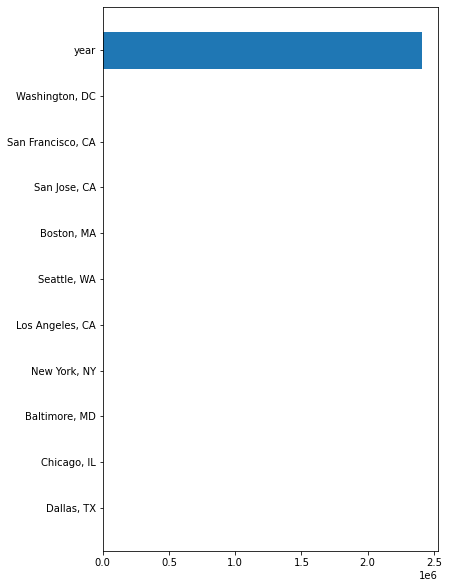

In [30]:
fig, ax = plt.subplots(figsize=(6,10))

cum_sorted = df_cum.sort_values(by=['AverageYearlyReturn(%)'], ascending = True)
plt.barh(y=cum_sorted['City'], width=cum_sorted['AverageYearlyReturn(%)'])

## Model Building

### Time series data decomposition

In [31]:
#Obtained this function from lecture 58 notebook. Used for better
#readabilty.

def display_df(dftest):
    '''
    Display the output from a Dickey-Fuller test in a more readable format
    '''
    
    
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    display(dfoutput)

Let's first start looking at the decomposition of our time series data of homes prices from 1996 - 2018 from Washington, DC.

In [32]:
#Decomposing
decomposition = seasonal_decompose(melted_df['Washington, DC'])

#General trend. (i.e. overtime,how does the house market change.)
trend = decomposition.trend

#Seasonal trend
seasonal = decomposition.seasonal

#This will be the leftover noise in the model.
residual = decomposition.resid

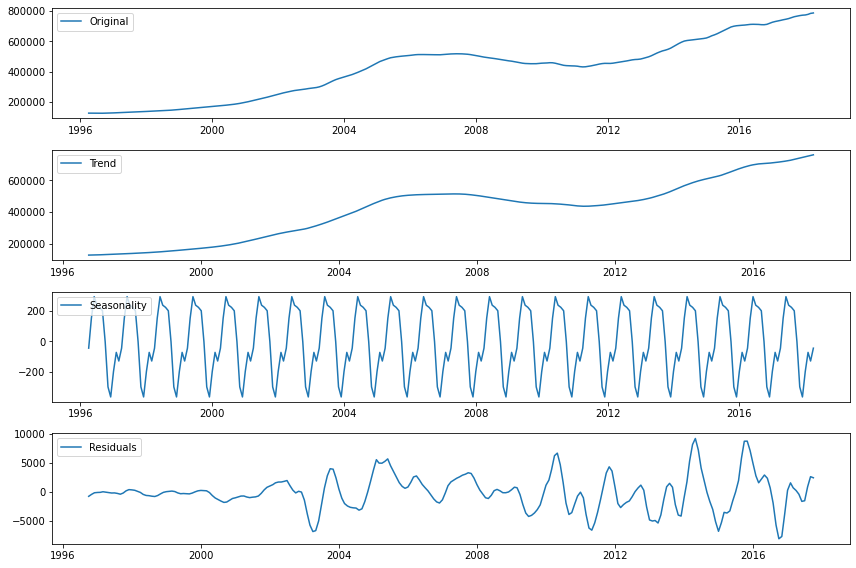

In [33]:
# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(melted_df['Washington, DC'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

In [34]:
# Drop NaN values from residuals.

house_ts_decompose = residual 
house_ts_decompose.dropna(inplace = True)

In [35]:
#After we take out the trend and the seasonality, we look at our residual
#with no null values.
dftest = adfuller(house_ts_decompose)

#Print out our results. 
display_df(dftest)

Test Statistic                  -4.719574
p-value                          0.000077
#Lags Used                      10.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64

We got a stationary time series but we see that there are some trends in there still. We know that because our residuals is heteroskedastic.

We are going to make a function that takes in all of our selected cities and make a time series model for all of the cities

In [36]:
#def decompose_ts(city):
  #  decomposition = seasonal_decompose(melted_df[city])
  #  trend = decomposition.trend
  #  seasonal = decomposition.seasonal
   # residual = decomposition.resid
    

### Baseline Model

Function to build baseline model

In [37]:
class baseline_mod:
    
    def __init__(self,city='Washington, DC'):
        self.city = city
    
    def plot_shift(self,df):
        ax = df[self.city].plot(figsize=(15,10))
        df[self.city].shift(1).plot()
        df[self.city].shift(2).plot()
        ax.legend(['Original', 'shift 1', 'shift 2'])
        plt.show()
        
        
    def shift_df(self, df):
        self.shifted_df = pd.DataFrame(np.hstack((df[self.city].values.reshape(-1, 1),
                                                  df[self.city].shift().values.reshape(-1, 1),
                                                  df[self.city].shift(periods=2).values.reshape(-1, 1))),
                                       columns=['orig', 'shifted_one_period', 'shifted_two_periods'],
                                       index=df.index)
        self.rmse_shift1_ = mean_squared_error(self.shifted_df['orig'][1:], self.shifted_df['shifted_one_period'][1:], squared=False)
        self.rmse_shift2_ = mean_squared_error(self.shifted_df['orig'][2:], self.shifted_df['shifted_two_periods'][2:], squared=False)
        return self.shifted_df

        

Look at plot of shifted time series for Washington, DC

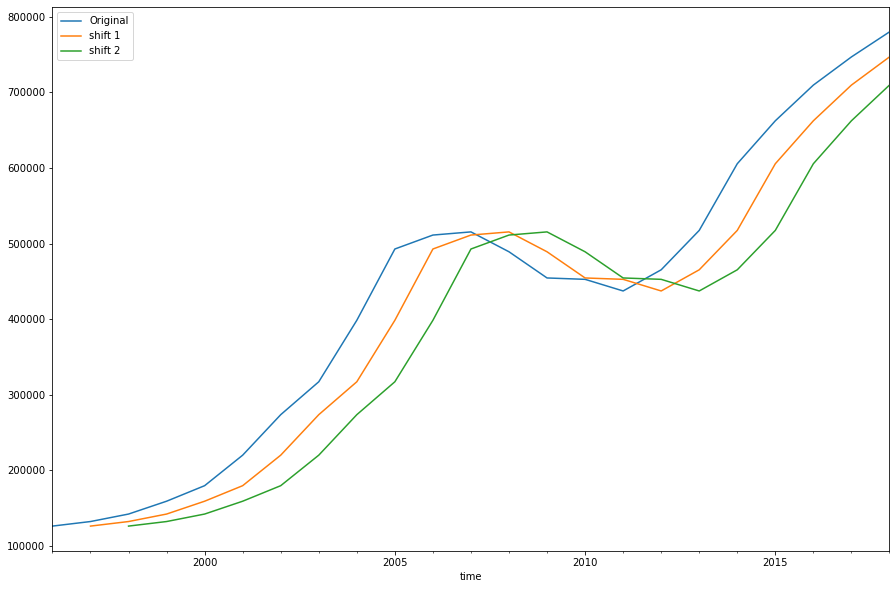

In [38]:
baseline_year = baseline_mod()
baseline_year.plot_shift(resampled_year)

Build dataframe of shifted values in Washington, DC.

In [39]:
baseline_year.shift_df(resampled_year)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-12-31  126250.0                 NaN                  NaN
1997-12-31  132275.0            126250.0                  NaN
1998-12-31  142175.0            132275.0             126250.0
1999-12-31  159150.0            142175.0             132275.0
2000-12-31  179700.0            159150.0             142175.0
2001-12-31  220050.0            179700.0             159150.0
2002-12-31  273600.0            220050.0             179700.0
2003-12-31  317125.0            273600.0             220050.0
2004-12-31  398425.0            317125.0             273600.0
2005-12-31  492725.0            398425.0             317125.0
2006-12-31  511175.0            492725.0             398425.0
2007-12-31  515350.0            511175.0             492725.0
2008-12-31  489050.0            515350.0             511175.0
2009-12-31  454425.0            489050.0             515350.0
2010-12-31  452600.0            454425.0             489050.0
2011-12-31  437225.0            452600.0             454425.0
2012-12-31  465225.0            437225.0             452600.0
2013-12-31  517325.0            465225.0             437225.0
2014-12-31  605500.0            517325.0             465225.0
2015-12-31  662300.0            605500.0             517325.0
2016-12-31  709500.0            662300.0             605500.0
2017-12-31  746750.0            709500.0             662300.0
2018-12-31  779850.0            746750.0             709500.0

In [40]:
print(baseline_year.rmse_shift1_)
print(baseline_year.rmse_shift2_)

44942.247030848586
87278.32651788132


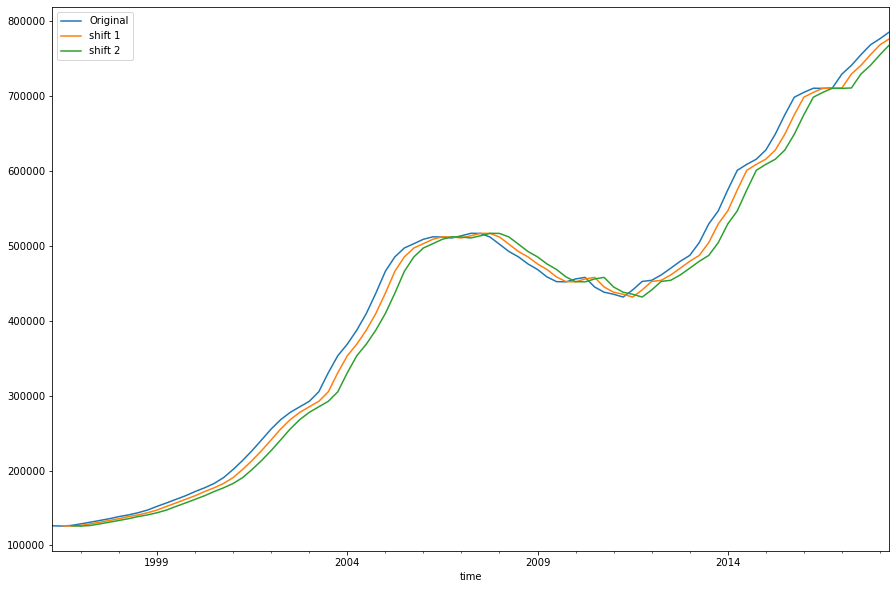

In [41]:
baseline_quarterly = baseline_mod()
baseline_quarterly.plot_shift(resampled_quarter)

In [42]:
baseline_quarterly.shift_df(resampled_quarter)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-06-30  126250.0                 NaN                  NaN
1996-09-30  125800.0            126250.0                  NaN
1996-12-31  126650.0            125800.0             126250.0
1997-03-31  128800.0            126650.0             125800.0
1997-06-30  131050.0            128800.0             126650.0
1997-09-30  133350.0            131050.0             128800.0
1997-12-31  135700.0            133350.0             131050.0
1998-03-31  138500.0            135700.0             133350.0
1998-06-30  140750.0            138500.0             135700.0
1998-09-30  143650.0            140750.0             138500.0
1998-12-31  147250.0            143650.0             140750.0
1999-03-31  152150.0            147250.0             143650.0
1999-06-30  156750.0            152150.0             147250.0
1999-09-30  161550.0            156750.0             152150.0
1999-12-31  166350.0            161550.0             156750.0
2000-03-31  171950.0            166350.0             161550.0
2000-06-30  176950.0            171950.0             166350.0
2000-09-30  182750.0            176950.0             171950.0
2000-12-31  190600.0            182750.0             176950.0
2001-03-31  201500.0            190600.0             182750.0
2001-06-30  213550.0            201500.0             190600.0
2001-09-30  226750.0            213550.0             201500.0
2001-12-31  241050.0            226750.0             213550.0
2002-03-31  255500.0            241050.0             226750.0
2002-06-30  268000.0            255500.0             241050.0
2002-09-30  277650.0            268000.0             255500.0
2002-12-31  285100.0            277650.0             268000.0
2003-03-31  292400.0            285100.0             277650.0
2003-06-30  305150.0            292400.0             285100.0
2003-09-30  330550.0            305150.0             292400.0
2003-12-31  353300.0            330550.0             305150.0
2004-03-31  368800.0            353300.0             330550.0
2004-06-30  387500.0            368800.0             353300.0
2004-09-30  409700.0            387500.0             368800.0
2004-12-31  436800.0            409700.0             387500.0
2005-03-31  466050.0            436800.0             409700.0
2005-06-30  485350.0            466050.0             436800.0
2005-09-30  497200.0            485350.0             466050.0
2005-12-31  502950.0            497200.0             485350.0
2006-03-31  508850.0            502950.0             497200.0
2006-06-30  512100.0            508850.0             502950.0
2006-09-30  511800.0            512100.0             508850.0
2006-12-31  510600.0            511800.0             512100.0
2007-03-31  513500.0            510600.0             511800.0
2007-06-30  516800.0            513500.0             510600.0
2007-09-30  516650.0            516800.0             513500.0
2007-12-31  511850.0            516650.0             516800.0
2008-03-31  502200.0            511850.0             516650.0
2008-06-30  492450.0            502200.0             511850.0
2008-09-30  485300.0            492450.0             502200.0
2008-12-31  475850.0            485300.0             492450.0
2009-03-31  468450.0            475850.0             485300.0
2009-06-30  458500.0            468450.0             475850.0
2009-09-30  452250.0            458500.0             468450.0
2009-12-31  451950.0            452250.0             458500.0
2010-03-31  455850.0            451950.0             452250.0
2010-06-30  457950.0            455850.0             451950.0
2010-09-30  445100.0            457950.0             455850.0
2010-12-31  438150.0            445100.0             457950.0
2011-03-31  435400.0            438150.0             445100.0
2011-06-30  431650.0            435400.0             438150.0
2011-09-30  441150.0            431650.0             435400.0
2011-12-31  452500.0            441150.0        

In [43]:
print(baseline_quarterly.rmse_shift1_)
print(baseline_quarterly.rmse_shift2_)

12208.992122053467
23845.184940100302


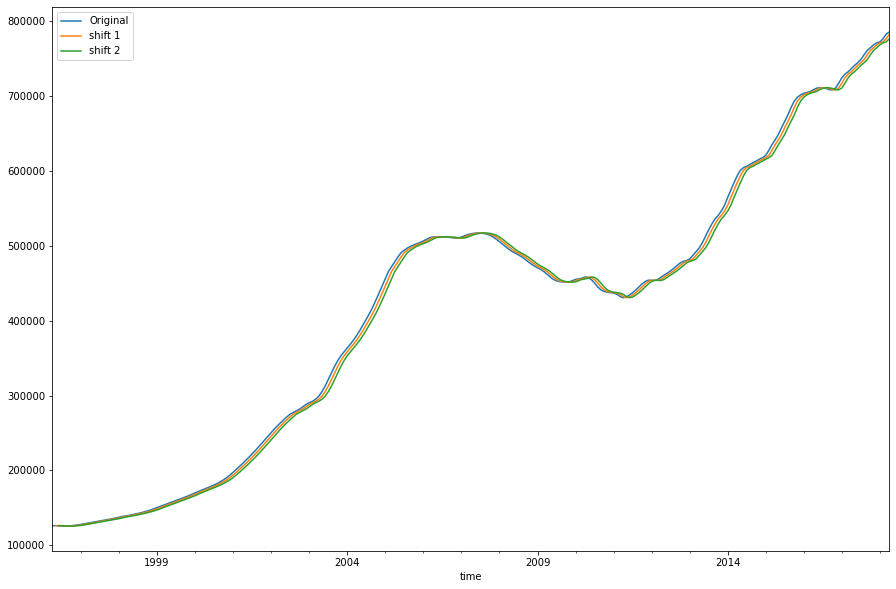

In [44]:
baseline_monthly = baseline_mod()
baseline_monthly.plot_shift(melted_df)

In [45]:
baseline_monthly.shift_df(melted_df)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-04-01  126500.0                 NaN                  NaN
1996-05-01  126250.0            126500.0                  NaN
1996-06-01  126000.0            126250.0             126500.0
1996-07-01  125800.0            126000.0             126250.0
1996-08-01  125750.0            125800.0             126000.0
1996-09-01  125900.0            125750.0             125800.0
1996-10-01  126250.0            125900.0             125750.0
1996-11-01  126650.0            126250.0             125900.0
1996-12-01  127300.0            126650.0             126250.0
1997-01-01  128050.0            127300.0             126650.0
1997-02-01  128800.0            128050.0             127300.0
1997-03-01  129500.0            128800.0             128050.0
1997-04-01  130200.0            129500.0             128800.0
1997-05-01  131050.0            130200.0             129500.0
1997-06-01  131900.0            131050.0             130200.0
1997-07-01  132650.0            131900.0             131050.0
1997-08-01  133350.0            132650.0             131900.0
1997-09-01  134000.0            133350.0             132650.0
1997-10-01  134800.0            134000.0             133350.0
1997-11-01  135700.0            134800.0             134000.0
1997-12-01  136650.0            135700.0             134800.0
1998-01-01  137600.0            136650.0             135700.0
1998-02-01  138500.0            137600.0             136650.0
1998-03-01  139150.0            138500.0             137600.0
1998-04-01  139950.0            139150.0             138500.0
1998-05-01  140750.0            139950.0             139150.0
1998-06-01  141700.0            140750.0             139950.0
1998-07-01  142650.0            141700.0             140750.0
1998-08-01  143650.0            142650.0             141700.0
1998-09-01  144750.0            143650.0             142650.0
1998-10-01  145950.0            144750.0             143650.0
1998-11-01  147250.0            145950.0             144750.0
1998-12-01  148800.0            147250.0             145950.0
1999-01-01  150500.0            148800.0             147250.0
1999-02-01  152150.0            150500.0             148800.0
1999-03-01  153650.0            152150.0             150500.0
1999-04-01  155200.0            153650.0             152150.0
1999-05-01  156750.0            155200.0             153650.0
1999-06-01  158350.0            156750.0             155200.0
1999-07-01  159950.0            158350.0             156750.0
1999-08-01  161550.0            159950.0             158350.0
1999-09-01  163150.0            161550.0             159950.0
1999-10-01  164750.0            163150.0             161550.0
1999-11-01  166350.0            164750.0             163150.0
1999-12-01  168150.0            166350.0             164750.0
2000-01-01  170100.0            168150.0             166350.0
2000-02-01  171950.0            170100.0             168150.0
2000-03-01  173650.0            171950.0             170100.0
2000-04-01  175300.0            173650.0             171950.0
2000-05-01  176950.0            175300.0             173650.0
2000-06-01  178750.0            176950.0             175300.0
2000-07-01  180650.0            178750.0             176950.0
2000-08-01  182750.0            180650.0             178750.0
2000-09-01  185050.0            182750.0             180650.0
2000-10-01  187650.0            185050.0             182750.0
2000-11-01  190600.0            187650.0             185050.0
2000-12-01  194000.0            190600.0             187650.0
2001-01-01  197650.0            194000.0             190600.0
2001-02-01  201500.0            197650.0             194000.0
2001-03-01  205350.0            201500.0             197650.0
2001-04-01  209400.0            205350.0             201500.0
2001-05-01  213550.0            209400.0             205350.0
2001-06-01  217850.0            213550.0        

In [46]:
print(baseline_monthly.rmse_shift1_)
print(baseline_monthly.rmse_shift2_)

4139.46156467898
8226.567713804458


### ARIMA model

In [47]:
def add_freq(idx, freq=None):
    """Add a frequency attribute to idx, through inference or directly.

    Returns a copy.  If `freq` is None, it is inferred.
    """

    idx = idx.copy()
    if freq is None:
        if idx.freq is None:
            freq = pd.infer_freq(idx)
        else:
            return idx
    idx.freq = pd.tseries.frequencies.to_offset(freq)
    if idx.freq is None:
        raise AttributeError('no discernible frequency found to `idx`.  Specify'
                             ' a frequency string with `freq`.')
    return idx

In [48]:
#We are adding frequency attribute to our dataframe index. 
melted_df.index = add_freq(melted_df.index)
#Check the length of our dataframe. 
melted_df.shape

(265, 10)

In [49]:
melted_df

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-04-01        126500.0      175950.0           306900.0     170600.0   
1996-05-01        126250.0      175650.0           307600.0     171000.0   
1996-06-01        126000.0      175800.0           308400.0     171600.0   
1996-07-01        125800.0      175150.0           309300.0     172200.0   
1996-08-01        125750.0      174400.0           310500.0     173000.0   
1996-09-01        125900.0      174000.0           312000.0     173800.0   
1996-10-01        126250.0      174050.0           313700.0     174800.0   
1996-11-01        126650.0      173850.0           315600.0     176000.0   
1996-12-01        127300.0      174000.0           318100.0     177400.0   
1997-01-01        128050.0      174150.0           321000.0     179000.0   
1997-02-01        128800.0      174200.0           323900.0     180600.0   
1997-03-01        129500.0      174500.0           326600.0     182000.0   
1997-04-01        130200.0      174950.0           329600.0     183600.0   
1997-05-01        131050.0      175550.0           332600.0     185100.0   
1997-06-01        131900.0      176400.0           335800.0     186700.0   
1997-07-01        132650.0      177100.0           339200.0     188300.0   
1997-08-01        133350.0      177900.0           342700.0     190000.0   
1997-09-01        134000.0      178800.0           346400.0     192800.0   
1997-10-01        134800.0      179800.0           350400.0     196000.0   
1997-11-01        135700.0      181000.0           354500.0     199400.0   
1997-12-01        136650.0      181850.0           359100.0     203100.0   
1998-01-01        137600.0      182850.0           364200.0     206900.0   
1998-02-01        138500.0      183700.0           369300.0     210600.0   
1998-03-01        139150.0      184350.0           374100.0     214100.0   
1998-04-01        139950.0      185050.0           379100.0     217600.0   
1998-05-01        140750.0      185650.0           384000.0     221000.0   
1998-06-01        141700.0      186350.0           388900.0     224300.0   
1998-07-01        142650.0      187100.0           393700.0     227500.0   
1998-08-01        143650.0      187950.0           398300.0     230700.0   
1998-09-01        144750.0      189400.0           402600.0     233800.0   
1998-10-01        145950.0      190500.0           406800.0     236900.0   
1998-11-01        147250.0      191950.0           410900.0     240000.0   
1998-12-01        148800.0      193650.0           415400.0     243100.0   
1999-01-01        150500.0      195350.0           420200.0     246300.0   
1999-02-01        152150.0      196950.0           425100.0     249200.0   
1999-03-01        153650.0      198450.0           430000.0     251900.0   
1999-04-01        155200.0      200000.0           435400.0     254500.0   
1999-05-01        156750.0      202000.0           441300.0     257100.0   
1999-06-01        158350.0      204250.0           447900.0     259700.0   
1999-07-01        159950.0      206500.0           455500.0     262300.0   
1999-08-01        161550.0      208850.0           463900.0     265000.0   
1999-09-01        163150.0      211200.0           473100.0     267300.0   
1999-10-01        164750.0      213650.0           483300.0     269600.0   
1999-11-01        166350.0      216150.0           494300.0     272200.0   
1999-12-01        168150.0      218900.0           506200.0     274900.0   
2000-01-01        170100.0      221800.0           518700.0     277700.0   
2000-02-01        171950.0      224700.0           530800.0     280500.0   
2000-03-01        173650.0      227550.0           542100.0     283100.0   
2000-04-01        175300.0      229750.0           552700.0     285600.0   
2000-05-01        176950.0      232650.0           562300.0     288000.0   
2000-06-01        178750.0      235600.0           570800.0 

We'll be splitting our data into our train-test split. 
We are making the first 80% of our data into the training set and the last 20% of our dataset into our test set.

In [50]:
train = melted_df.iloc[:212]
test = melted_df.iloc[212:]

In [51]:
# #Here, we are splitting the training set into cross-validations score. 
# split = TimeSeriesSplit()
# for train_ind, val_ind in split.split(train):
    
# #     print(f'Train index: {train_ind}')
# #     print(f'Test  index: {val_ind}')

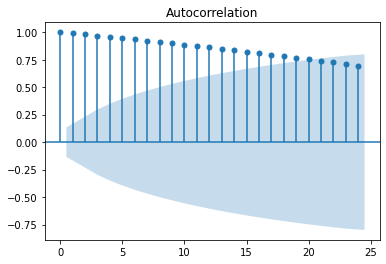

In [52]:
#Plotting the acf for Washington DC just for visualization. 
plot_acf(train['Washington, DC'].dropna());

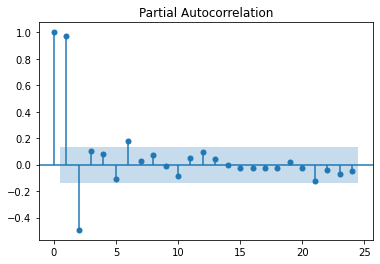

In [53]:
#Plotted our PACF for Washington DC.
#Diff is plotting the particial autocorrelation of the graph.
plot_pacf(train['Washington, DC'].diff().dropna());

In [54]:
class arima_mod: 
    
    def __init__(self, city = 'Washington, DC'):
        self.city = city 

        
    def model(self, df_train, df_test,p,d,q):
        #Fitting our model using ARIMA and instantiating it
        self.model_fit = ARIMA(df_train[self.city], order = [p,d,q]).fit()
        #Creating our prediction 
        self.y_hat_test_ = self.model_fit.predict(start=df_test[self.city].index[0], 
                                                  end=df_test[self.city].index[-1],typ='levels')
        self.model_summary_ = self.model_fit.summary()
        self.rmse_ = mean_squared_error(df_test[self.city],
                                        self.y_hat_test_,
                                        squared=False)
        print(self.model_summary_)
        print('-'*23)
        print('-'*23)
        print(f'RMSE: {self.rmse_}')
    
    def plot(self, df_test):
        fig, ax = plt.subplots(figsize = (12,8)) 
        ax.plot(df_test[self.city])
        ax.plot(self.y_hat_test_)
        ax.legend(['Original', 'Predicted'])
        ax.set_title(f'Original vs Predicted home values for {self.city}')

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1992.882
Date:                Fri, 13 May 2022   AIC                           3997.764
Time:                        10:30:52   BIC                           4017.875
Sample:                    04-01-1996   HQIC                          4005.893
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1297      0.046     45.811      0.000       2.039       2.221
ar.L2         -1.2612      0.062    -20.249      0.000      -1.383      -1.139
ar.L3          0.1314      0.017      7.552      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2067.061
Date:                Fri, 13 May 2022   AIC                           4146.123
Time:                        10:30:53   BIC                           4166.234
Sample:                    04-01-1996   HQIC                          4154.252
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3167      1.967      0.669      0.503      -2.538       5.171
ar.L2         -0.3474      1.964     -0.177      0.860      -4.197       3.502
ar.L3          0.0068      0.071      0.096      0.9

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2510.632
Date:                Fri, 13 May 2022   AIC                           5033.264
Time:                        10:30:54   BIC                           5053.375
Sample:                    04-01-1996   HQIC                          5041.393
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9036      0.016    117.963      0.000       1.872       1.935
ar.L2         -0.9353      0.019    -50.377      0.000      -0.972      -0.899
ar.L3          0.0313      0.003     10.774      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2056.190
Date:                Fri, 13 May 2022   AIC                           4124.380
Time:                        10:30:56   BIC                           4144.491
Sample:                    04-01-1996   HQIC                          4132.509
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9522      0.205      9.525      0.000       1.550       2.354
ar.L2         -0.9682      0.191     -5.057      0.000      -1.344      -0.593
ar.L3          0.0160      0.011      1.428      0.1

                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2038.806
Date:                Fri, 13 May 2022   AIC                           4089.612
Time:                        10:31:01   BIC                           4109.723
Sample:                    04-01-1996   HQIC                          4097.741
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0207      0.181     11.178      0.000       1.666       2.375
ar.L2         -1.1130      0.190     -5.859      0.000      -1.485      -0.741
ar.L3          0.0908      0.016      5.796      0.0

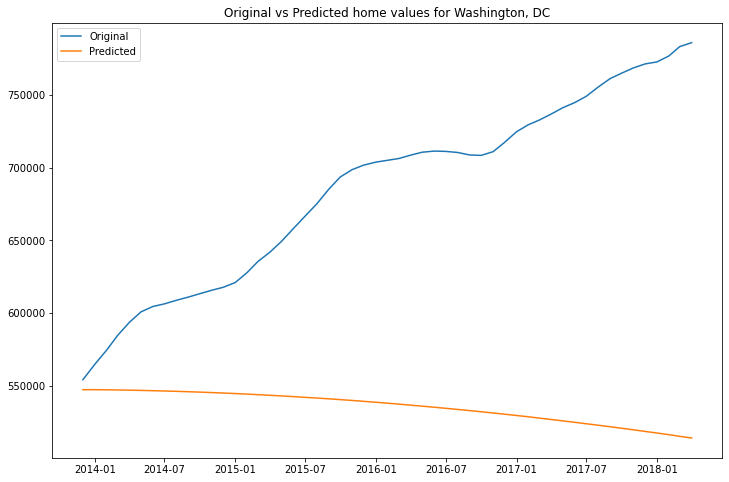

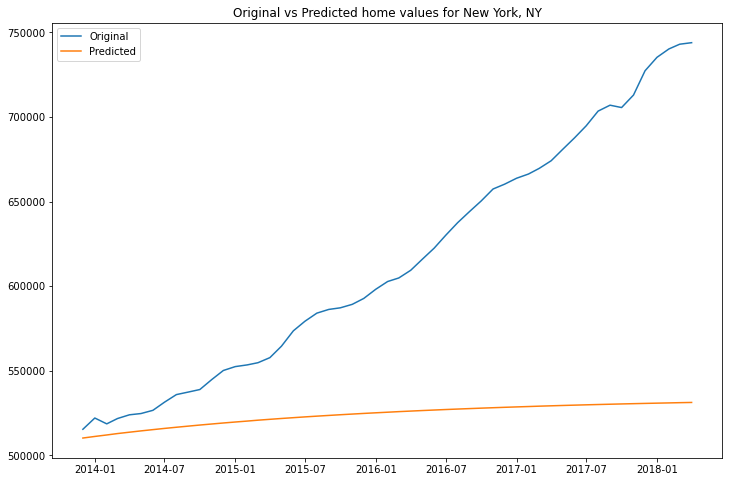

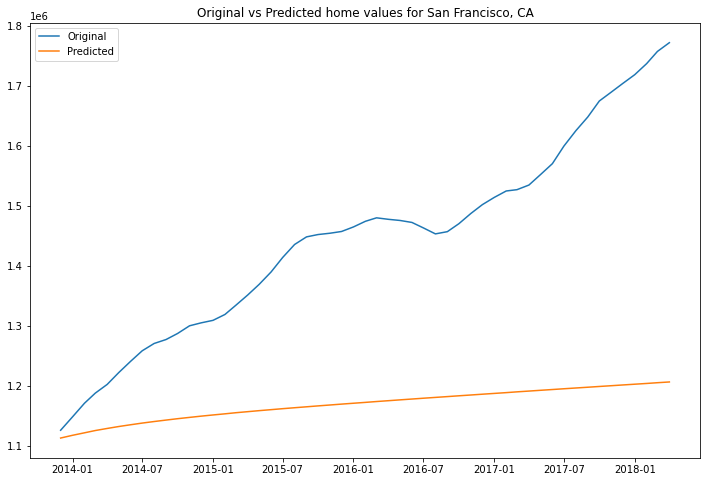

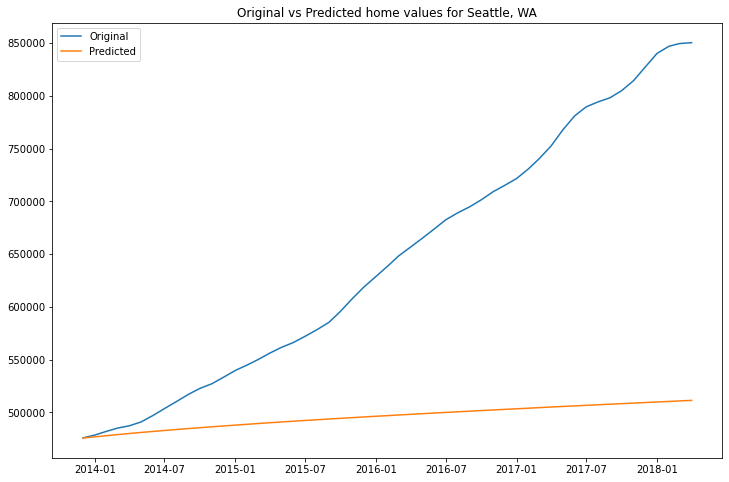

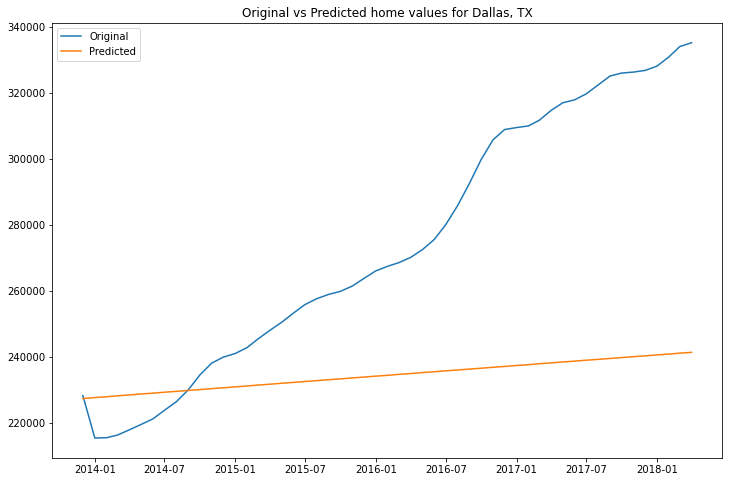

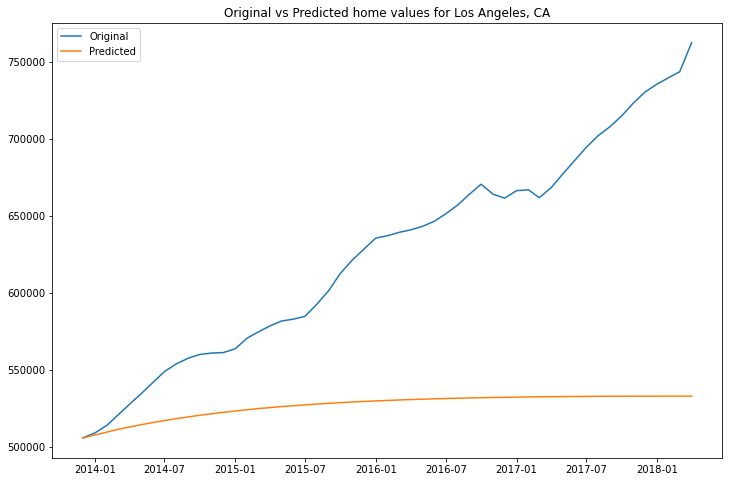

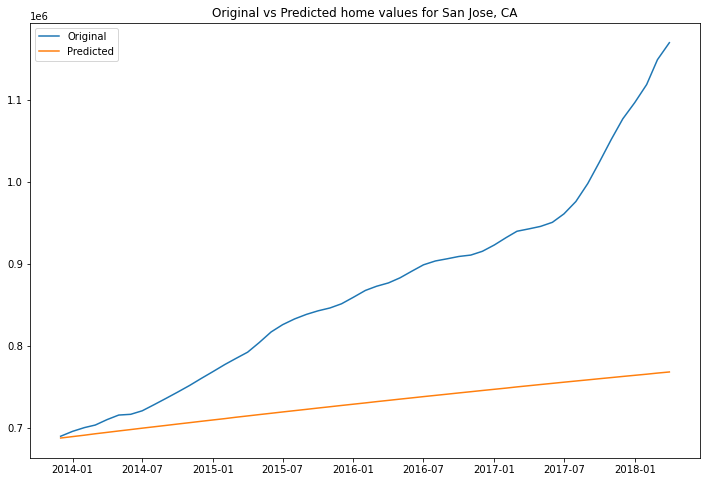

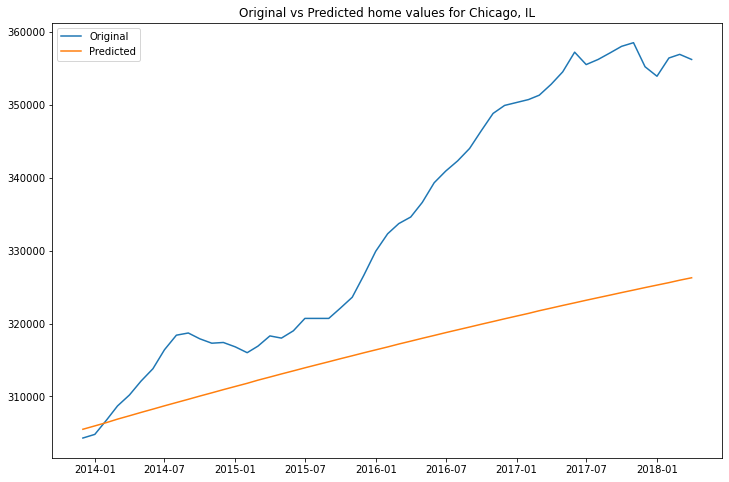

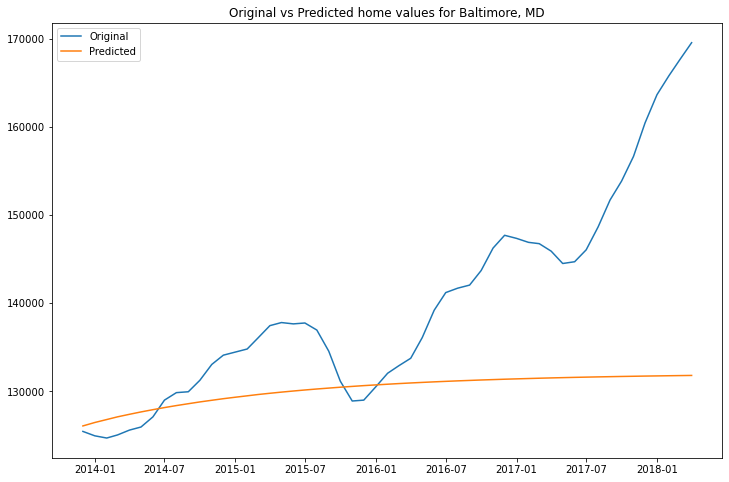

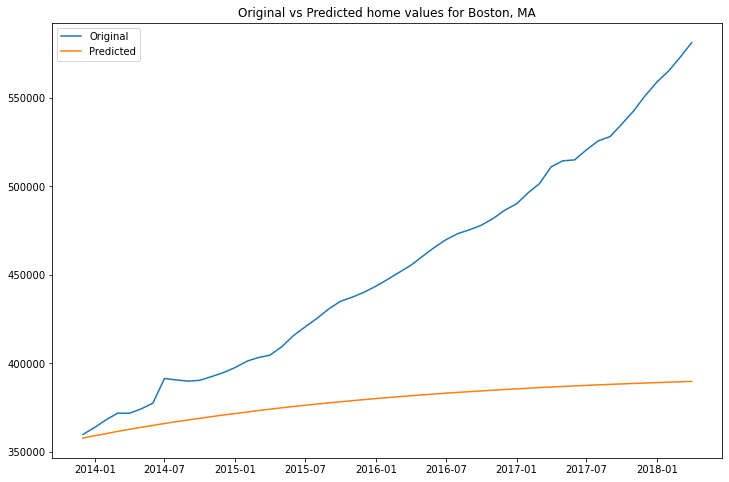

In [55]:
#Not using this model.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,1,2)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1692.712
Date:                Fri, 13 May 2022   AIC                           3395.424
Time:                        10:31:04   BIC                           3412.159
Sample:                    04-01-1996   HQIC                          3402.189
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2886      0.594      2.169      0.030       0.124       2.453
ar.L2         -0.3074      0.581     -0.529      0.597      -1.447       0.832
ma.L1         -1.2464      0.587     -2.124      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1965.509
Date:                Fri, 13 May 2022   AIC                           3941.018
Time:                        10:31:04   BIC                           3957.753
Sample:                    04-01-1996   HQIC                          3947.783
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0611      2.709      0.023      0.982      -5.248       5.370
ar.L2          0.6842      2.338      0.293      0.770      -3.899       5.267
ma.L1         -0.1859      2.706     -0.069      0.9

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1924.040
Date:                Fri, 13 May 2022   AIC                           3858.080
Time:                        10:31:08   BIC                           3874.815
Sample:                    04-01-1996   HQIC                          3864.845
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0745      6.315      0.012      0.991     -12.302      12.452
ar.L2          0.6592      5.288      0.125      0.901      -9.705      11.023
ma.L1         -0.1355      6.314     -0.021      0.9

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1753.249
Date:                Fri, 13 May 2022   AIC                           3516.498
Time:                        10:31:10   BIC                           3533.234
Sample:                    04-01-1996   HQIC                          3523.264
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5498      0.119     13.035      0.000       1.317       1.783
ar.L2         -0.8602      0.125     -6.900      0.000      -1.105      -0.616
ma.L1         -1.5396      0.130    -11.876      0.0

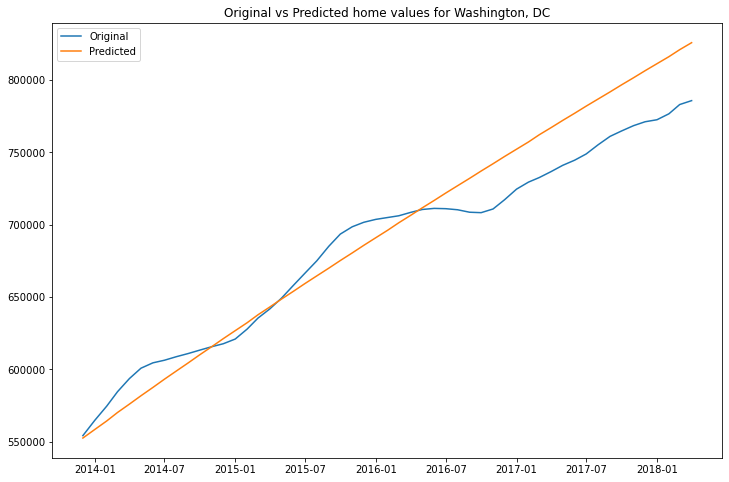

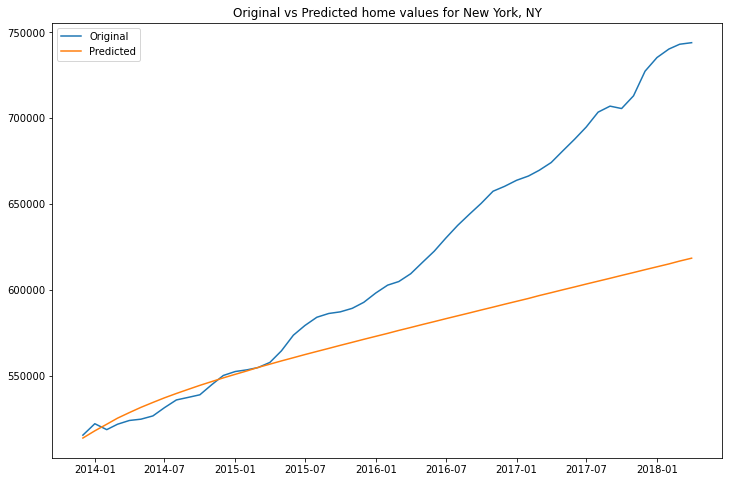

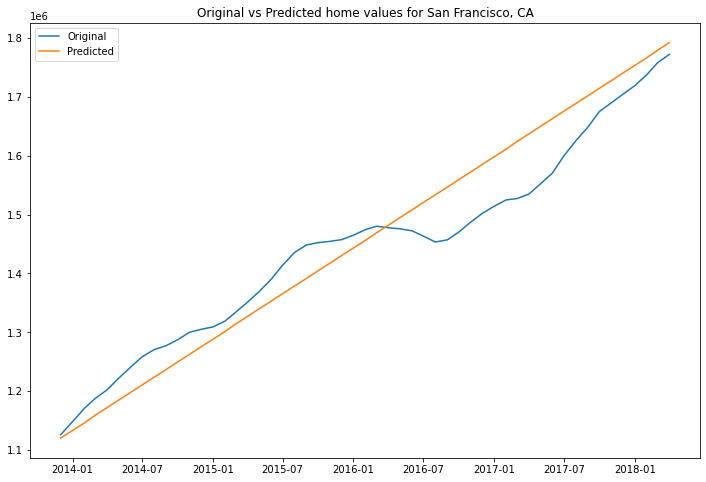

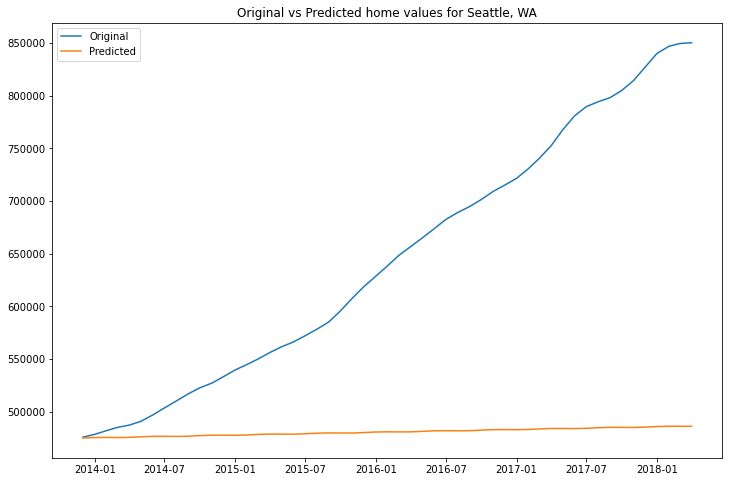

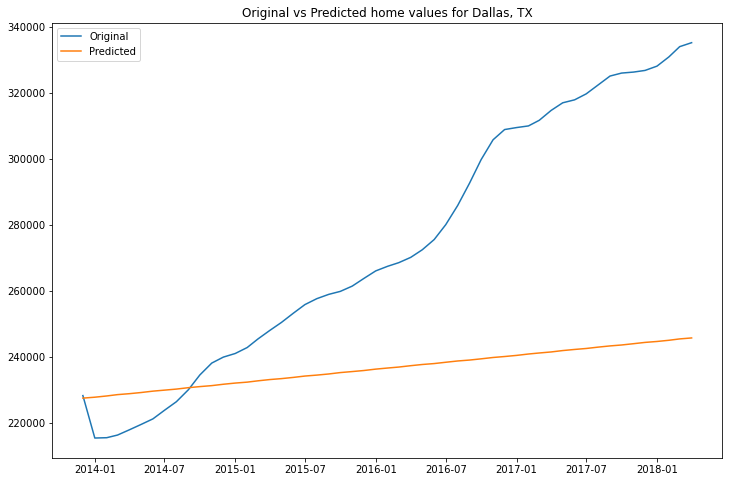

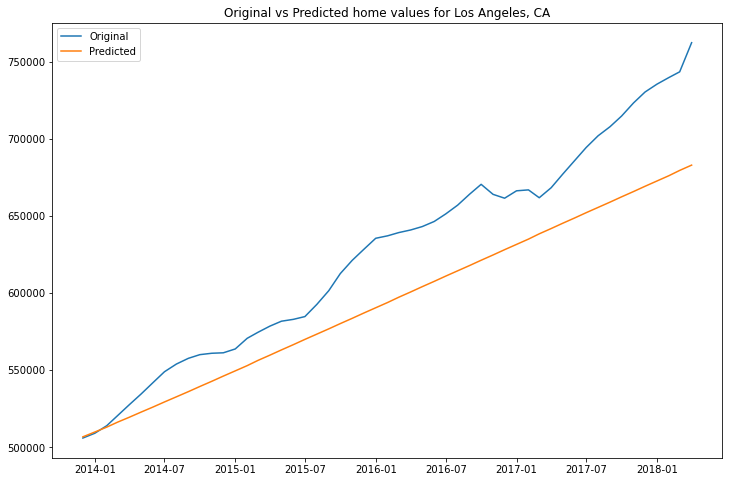

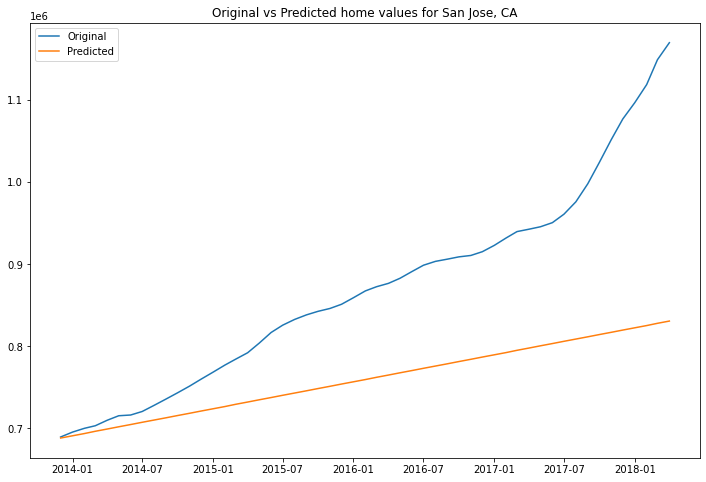

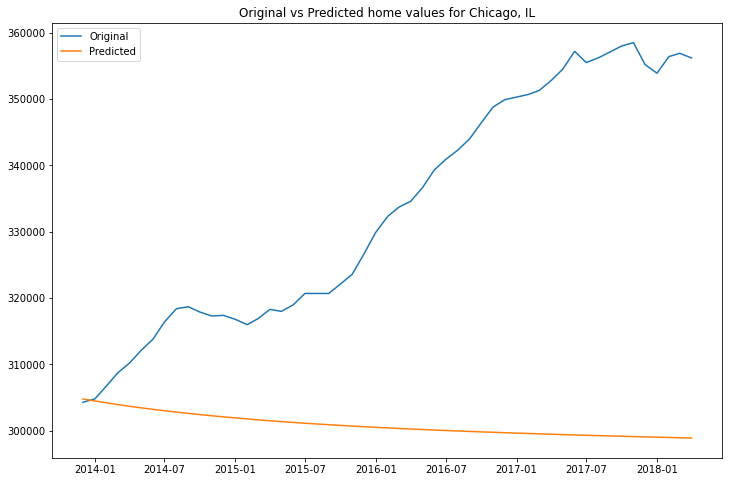

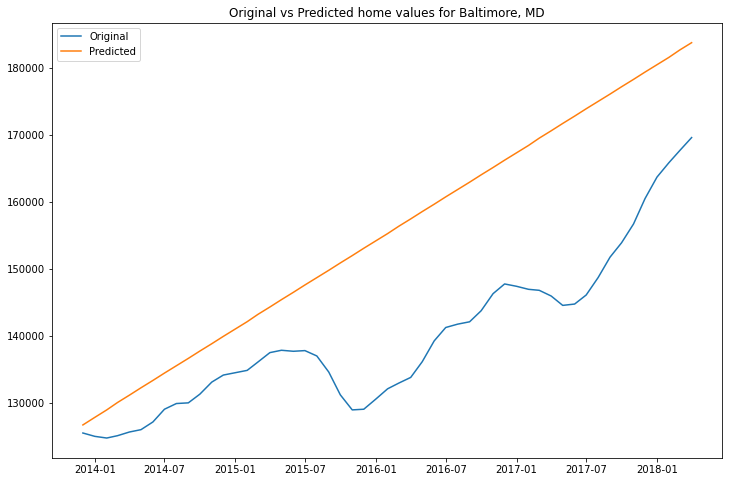

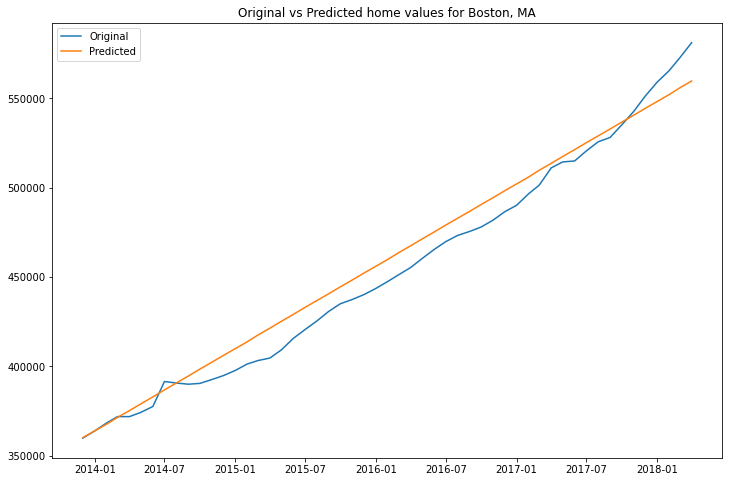

In [56]:
#4 graphs are good.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2, 2, 2)
    city_model.plot(test)

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1695.251
Date:                Fri, 13 May 2022   AIC                           3402.503
Time:                        10:31:14   BIC                           3422.586
Sample:                    04-01-1996   HQIC                          3410.622
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7977      2.180      0.825      0.410      -2.476       6.071
ar.L2         -0.9190      2.083     -0.441      0.659      -5.001       3.163
ar.L3          0.0674      0.172      0.393      0.6

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1965.110
Date:                Fri, 13 May 2022   AIC                           3942.220
Time:                        10:31:15   BIC                           3962.303
Sample:                    04-01-1996   HQIC                          3950.339
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1543      1.574      0.098      0.922      -2.930       3.239
ar.L2          0.5883      1.353      0.435      0.664      -2.063       3.239
ar.L3         -0.0199      0.039     -0.508      0.6

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1976.939
Date:                Fri, 13 May 2022   AIC                           3965.879
Time:                        10:31:15   BIC                           3985.961
Sample:                    04-01-1996   HQIC                          3973.997
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1180      2.761      0.043      0.966      -5.293       5.528
ar.L2          0.8015      2.655      0.302      0.763      -4.401       6.004
ar.L3         -0.0154      0.036     -0.424      0.6

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1923.997
Date:                Fri, 13 May 2022   AIC                           3859.993
Time:                        10:31:18   BIC                           3880.076
Sample:                    04-01-1996   HQIC                          3868.112
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1328      3.549      0.037      0.970      -6.823       7.088
ar.L2          0.5597      3.011      0.186      0.853      -5.342       6.461
ar.L3         -0.0064      0.026     -0.242      0.8

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           San Jose, CA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1874.546
Date:                Fri, 13 May 2022   AIC                           3761.092
Time:                        10:31:18   BIC                           3781.175
Sample:                    04-01-1996   HQIC                          3769.211
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3408      4.717      0.072      0.942      -8.904       9.585
ar.L2          0.5887      4.536      0.130      0.897      -8.301       9.479
ar.L3         -0.0002      0.045     -0.004      0.9

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1723.660
Date:                Fri, 13 May 2022   AIC                           3459.320
Time:                        10:31:19   BIC                           3479.403
Sample:                    04-01-1996   HQIC                          3467.439
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1471      1.293      0.114      0.909      -2.387       2.681
ar.L2          0.7669      1.281      0.599      0.549      -1.743       3.277
ar.L3         -0.0250      0.025     -0.995      0.3

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1611.014
Date:                Fri, 13 May 2022   AIC                           3234.029
Time:                        10:31:20   BIC                           3254.111
Sample:                    04-01-1996   HQIC                          3242.147
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3926      1.080      0.363      0.716      -1.724       2.509
ar.L2          0.0953      0.488      0.195      0.845      -0.861       1.052
ar.L3          0.0154      0.167      0.092      0.9

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1753.166
Date:                Fri, 13 May 2022   AIC                           3518.332
Time:                        10:31:21   BIC                           3538.415
Sample:                    04-01-1996   HQIC                          3526.451
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4086      0.589      2.391      0.017       0.254       2.563
ar.L2         -0.6299      0.507     -1.242      0.214      -1.624       0.364
ar.L3          0.0005      0.057      0.009      0.9

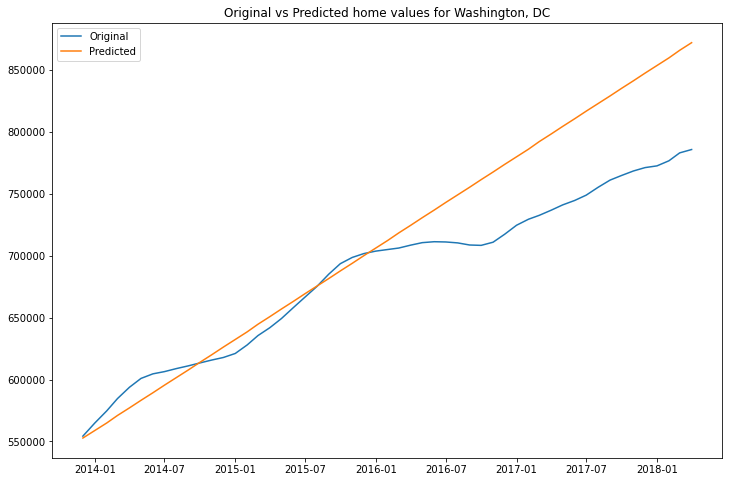

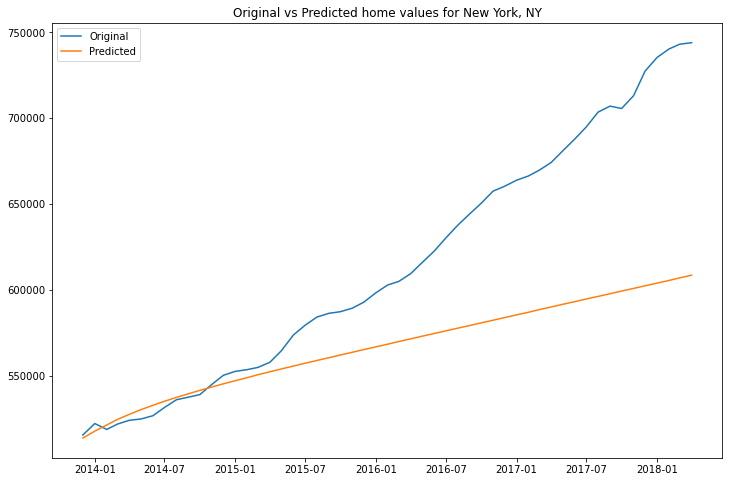

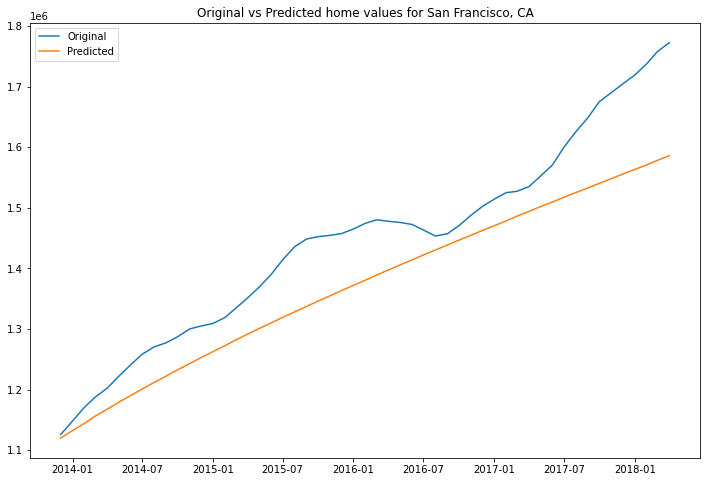

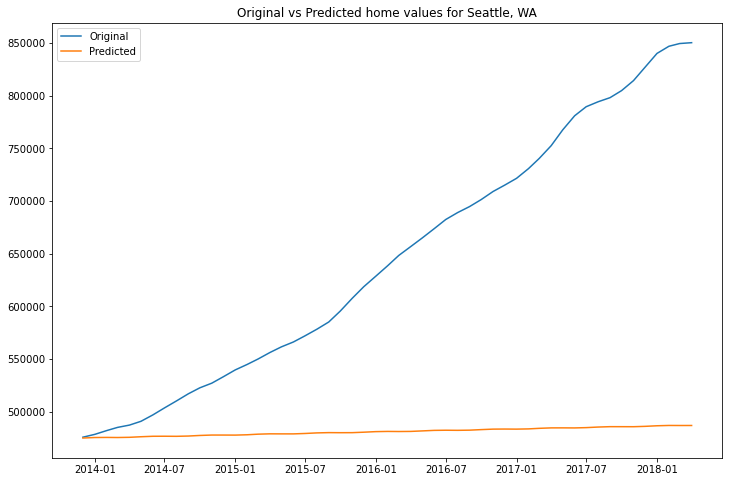

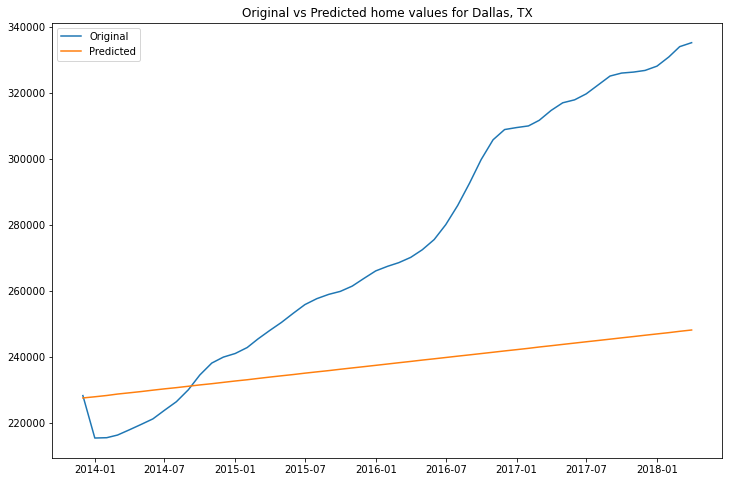

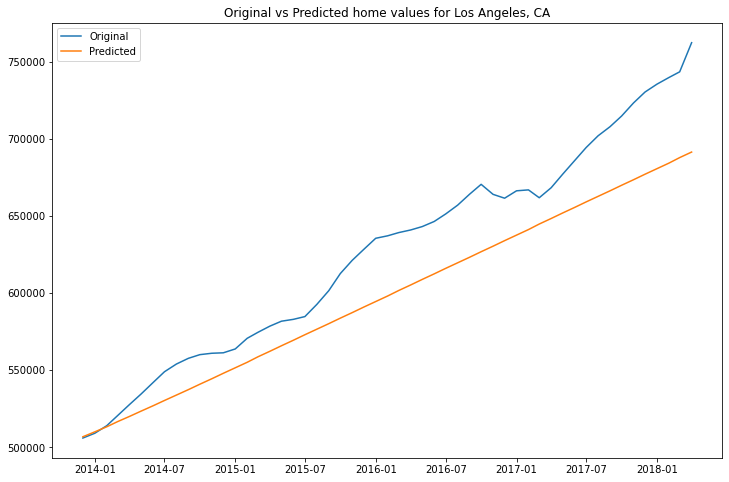

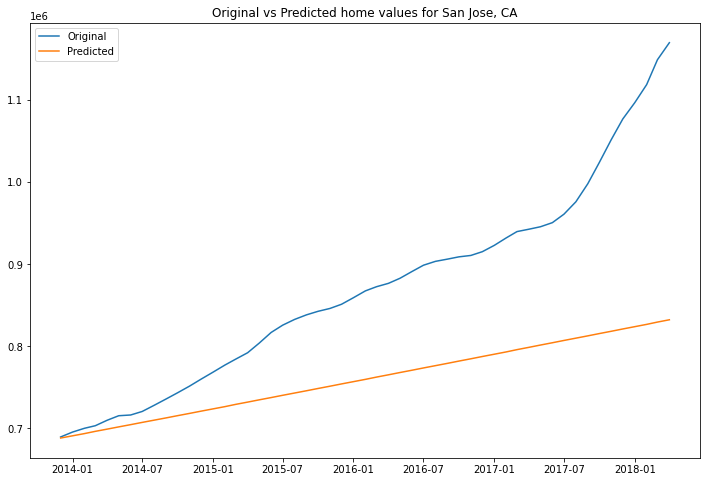

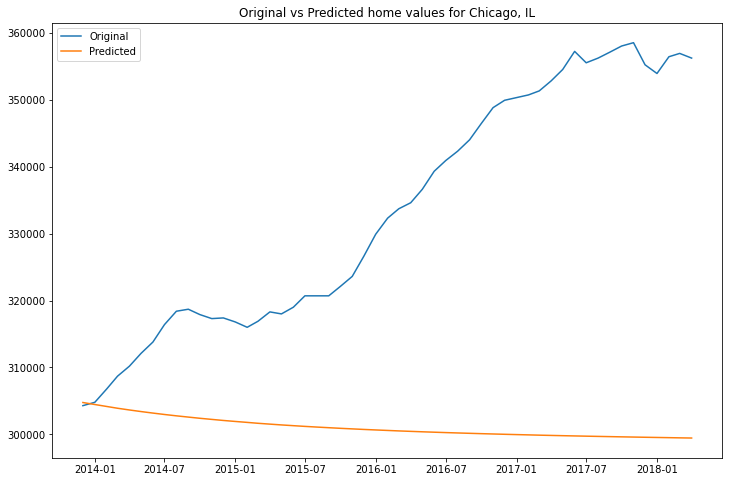

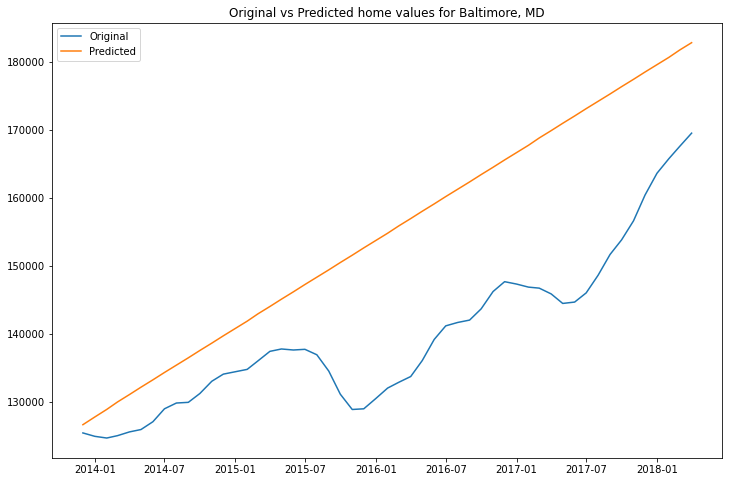

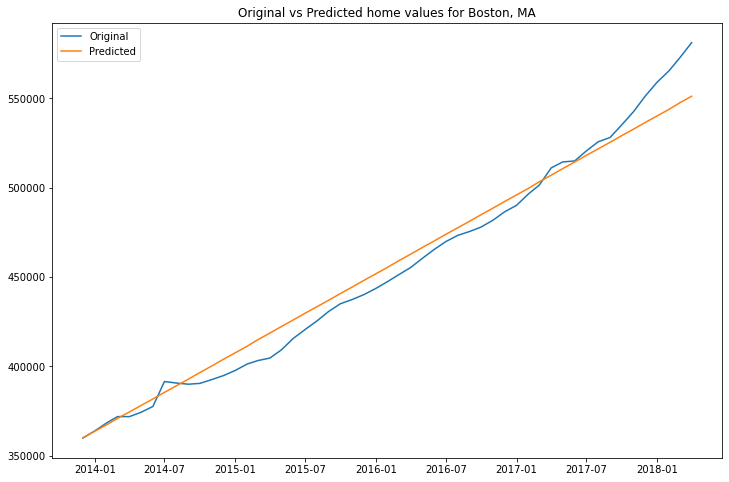

In [57]:
#4 but with an edge. Best Model
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,2,2)
    city_model.plot(test)

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1672.635
Date:                Fri, 13 May 2022   AIC                           3357.269
Time:                        10:31:24   BIC                           3377.323
Sample:                    04-01-1996   HQIC                          3365.377
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1913      0.456      0.419      0.675      -0.703       1.086
ar.L2          0.4160      0.362      1.150      0.250      -0.293       1.125
ar.L3         -0.0735      0.027     -2.687      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1962.057
Date:                Fri, 13 May 2022   AIC                           3936.114
Time:                        10:31:25   BIC                           3956.168
Sample:                    04-01-1996   HQIC                          3944.222
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7466      0.154      4.853      0.000       0.445       1.048
ar.L2         -0.0034      0.068     -0.050      0.960      -0.137       0.130
ar.L3         -0.0246      0.032     -0.771      0.4

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1737.707
Date:                Fri, 13 May 2022   AIC                           3487.414
Time:                        10:31:27   BIC                           3507.468
Sample:                    04-01-1996   HQIC                          3495.522
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2929      1.125     -0.260      0.794      -2.497       1.911
ar.L2          0.6484      0.891      0.727      0.467      -1.098       2.395
ar.L3         -0.0587      0.075     -0.782      0.4

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1540.593
Date:                Fri, 13 May 2022   AIC                           3093.186
Time:                        10:31:28   BIC                           3113.240
Sample:                    04-01-1996   HQIC                          3101.294
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8574      0.180     -4.759      0.000      -1.211      -0.504
ar.L2         -0.7931      0.099     -7.979      0.000      -0.988      -0.598
ar.L3         -0.0689      0.038     -1.830      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1741.631
Date:                Fri, 13 May 2022   AIC                           3495.261
Time:                        10:31:31   BIC                           3515.315
Sample:                    04-01-1996   HQIC                          3503.369
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1699      0.464      0.366      0.714      -0.740       1.080
ar.L2          0.2837      0.312      0.910      0.363      -0.327       0.894
ar.L3         -0.0422      0.026     -1.617      0.1

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1754.364
Date:                Fri, 13 May 2022   AIC                           3520.728
Time:                        10:31:32   BIC                           3540.782
Sample:                    04-01-1996   HQIC                          3528.836
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2754      0.164      7.767      0.000       0.954       1.597
ar.L2         -0.4510      0.093     -4.837      0.000      -0.634      -0.268
ar.L3         -0.0424      0.046     -0.927      0.3

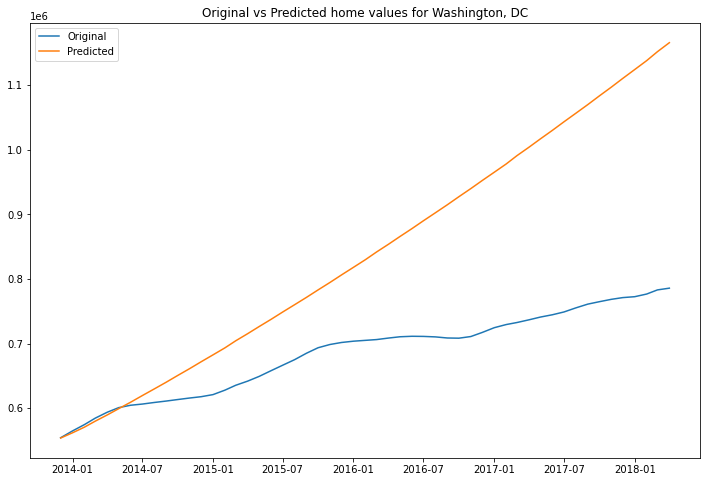

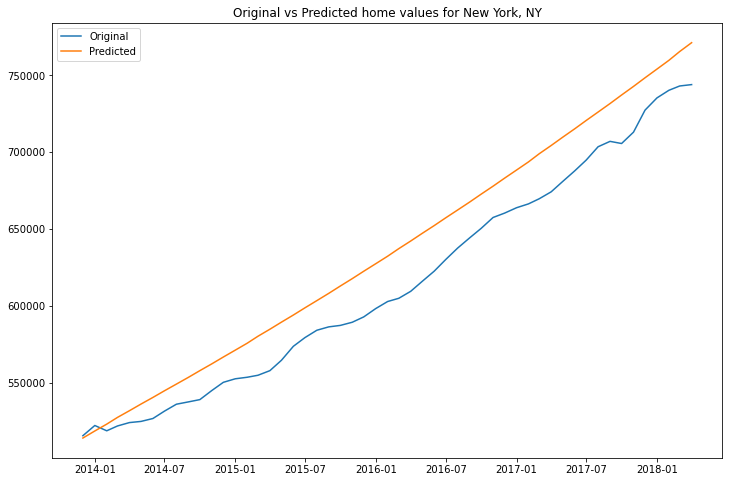

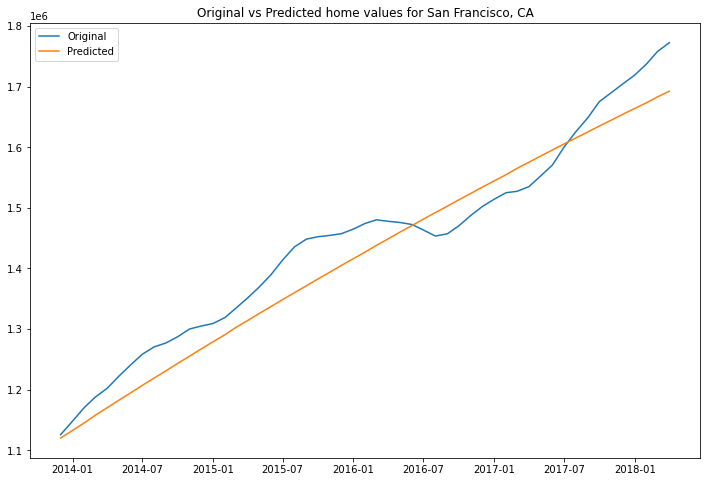

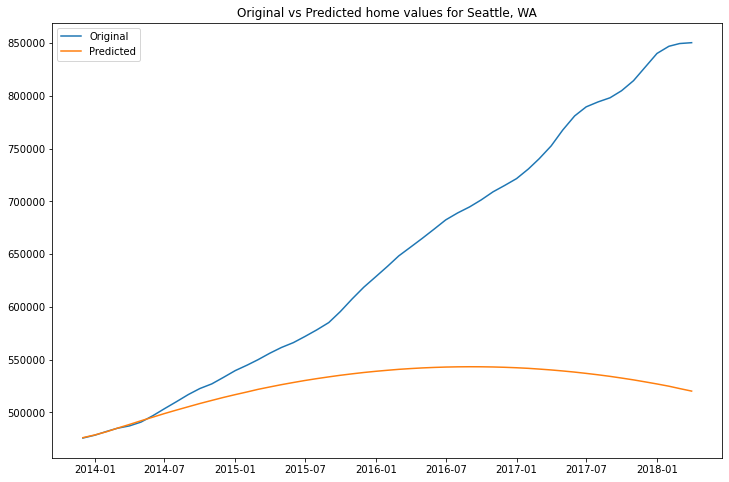

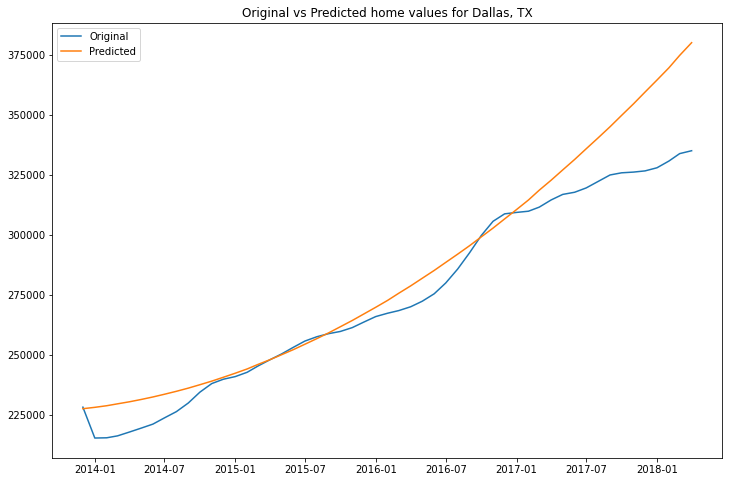

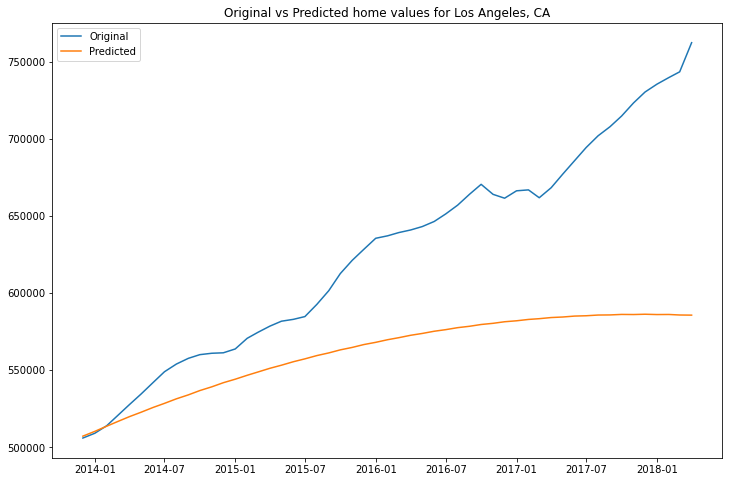

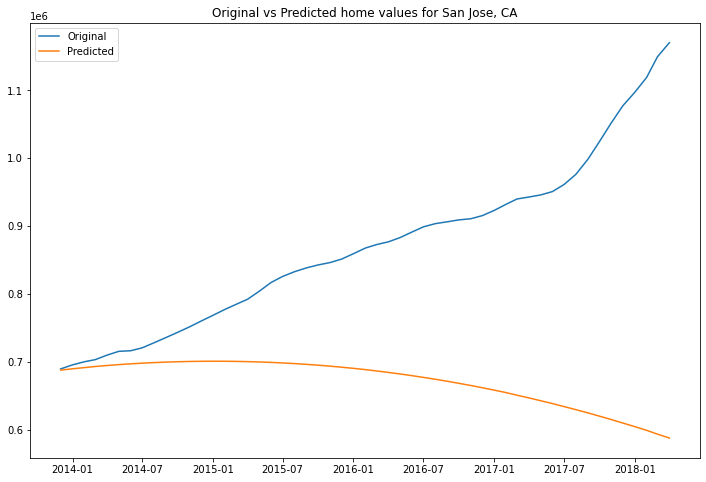

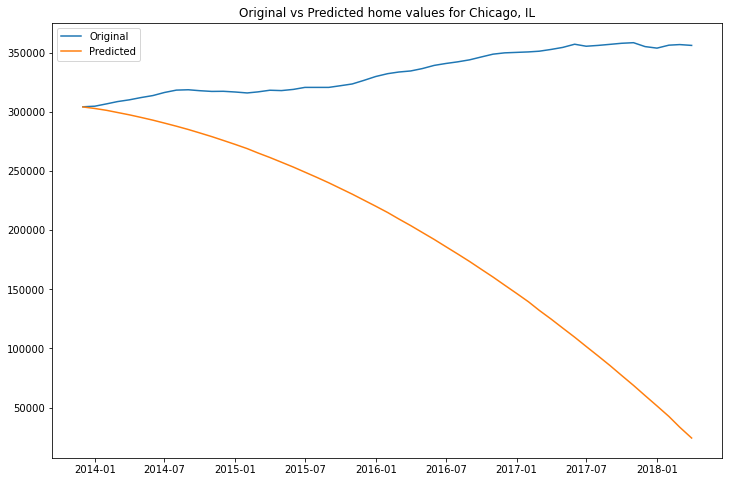

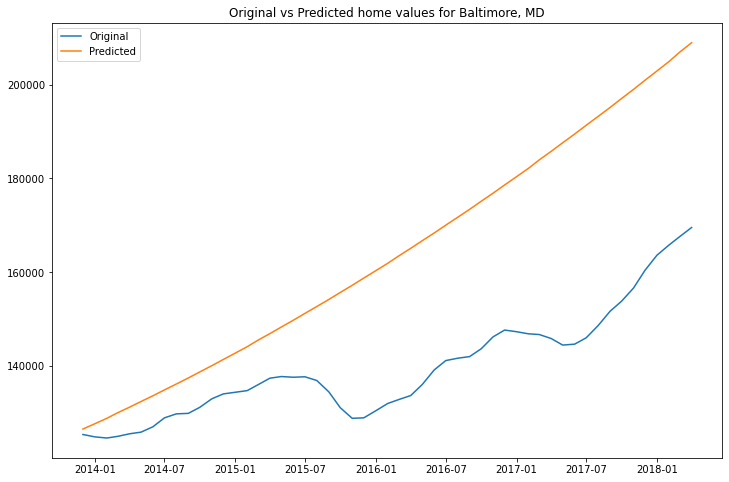

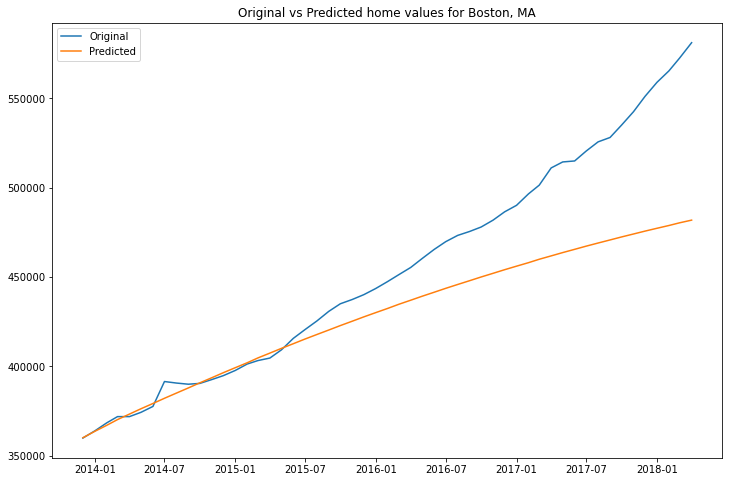

In [58]:
#3 useful graphs 
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,2)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1670.796
Date:                Fri, 13 May 2022   AIC                           3351.592
Time:                        10:31:36   BIC                           3368.304
Sample:                    04-01-1996   HQIC                          3358.349
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5410      0.172      8.945      0.000       1.203       1.879
ar.L2         -0.6540      0.124     -5.293      0.000      -0.896      -0.412
ma.L1         -1.7699      0.179     -9.899      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1966.903
Date:                Fri, 13 May 2022   AIC                           3943.805
Time:                        10:31:37   BIC                           3960.517
Sample:                    04-01-1996   HQIC                          3950.562
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0638      0.065    -16.491      0.000      -1.190      -0.937
ar.L2         -0.0707      0.045     -1.562      0.118      -0.159       0.018
ma.L1         -0.0065      0.062     -0.105      0.9

                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1923.048
Date:                Fri, 13 May 2022   AIC                           3856.095
Time:                        10:31:39   BIC                           3872.807
Sample:                    04-01-1996   HQIC                          3862.852
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1279      0.033    -34.362      0.000      -1.192      -1.064
ar.L2         -0.1279      0.033     -3.887      0.000      -0.192      -0.063
ma.L1         -0.0003      0.135     -0.003      0.9

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1630.420
Date:                Fri, 13 May 2022   AIC                           3270.839
Time:                        10:31:42   BIC                           3287.551
Sample:                    04-01-1996   HQIC                          3277.596
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2113      0.131      1.607      0.108      -0.046       0.469
ar.L2         -0.0557      0.088     -0.632      0.527      -0.228       0.117
ma.L1         -0.7416      0.139     -5.339      0.0

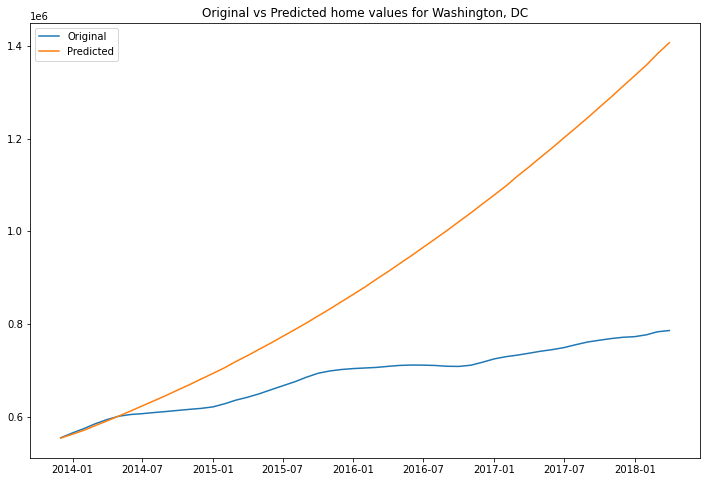

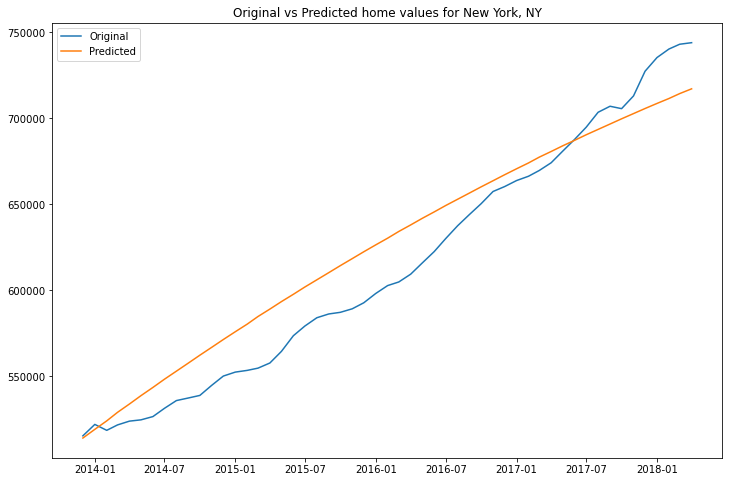

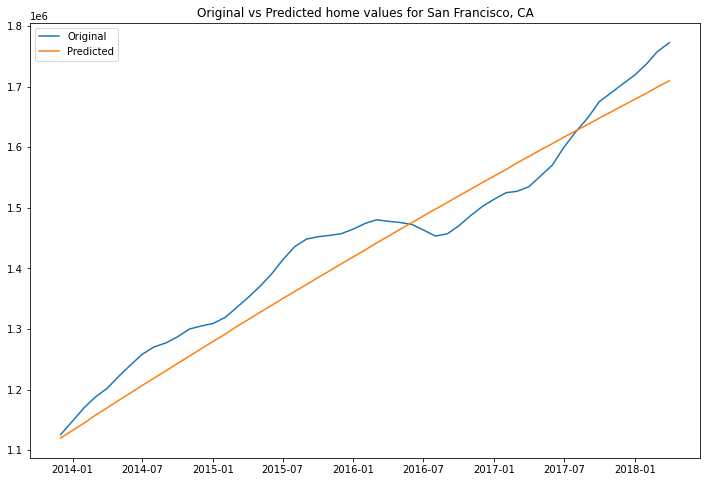

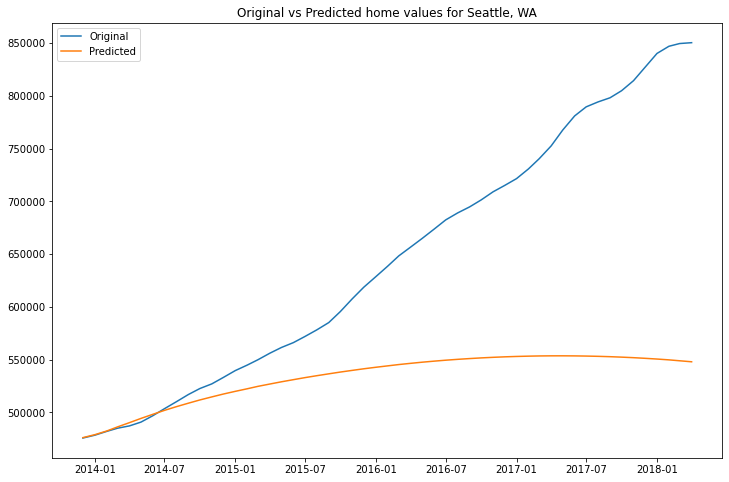

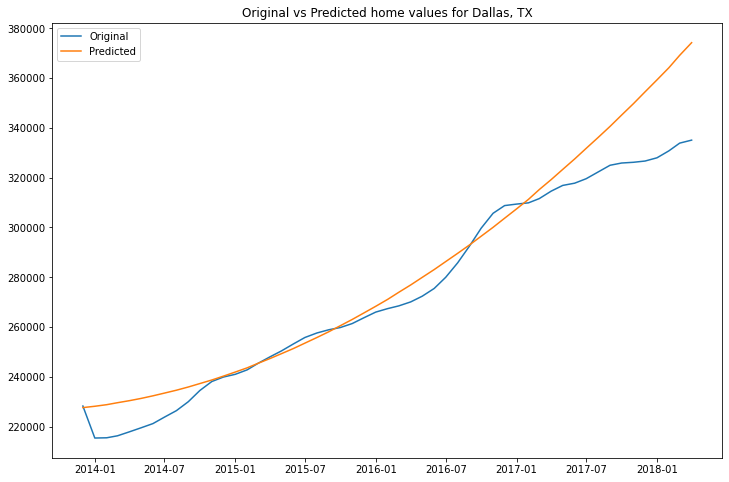

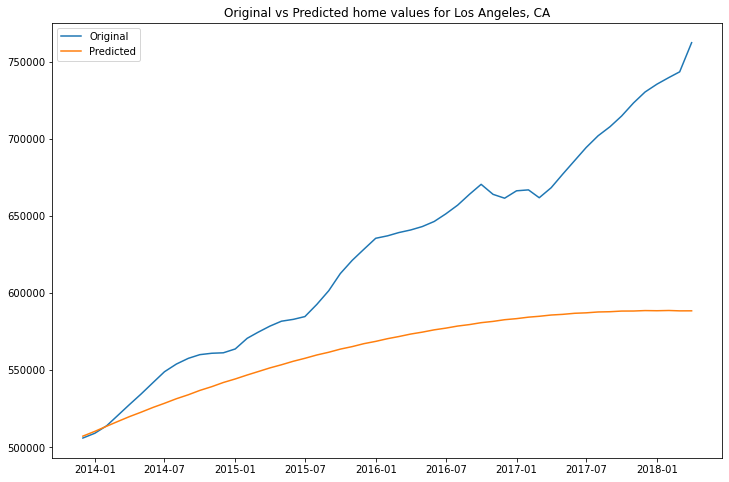

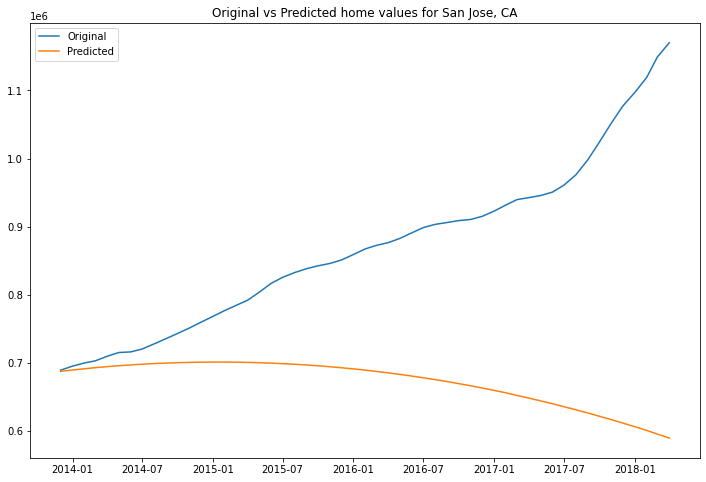

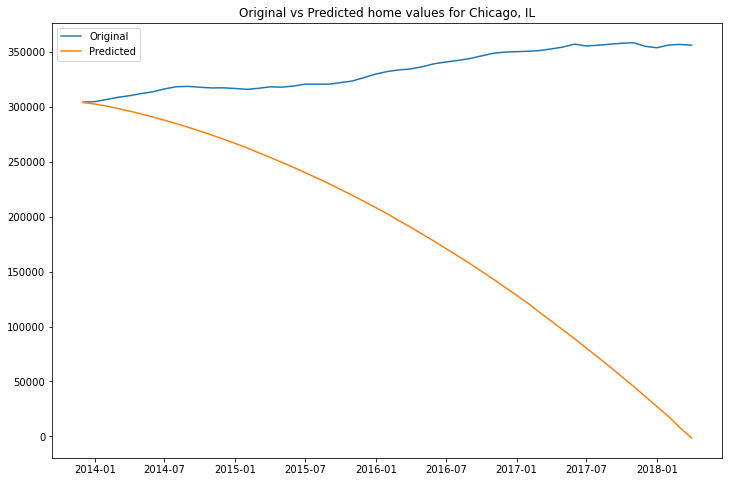

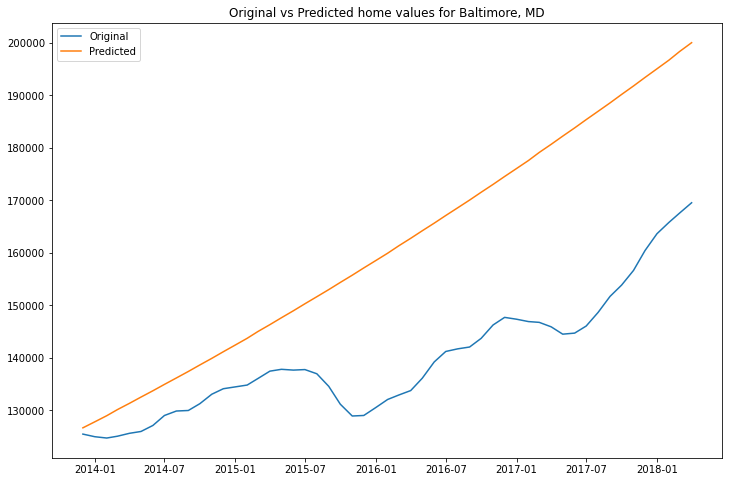

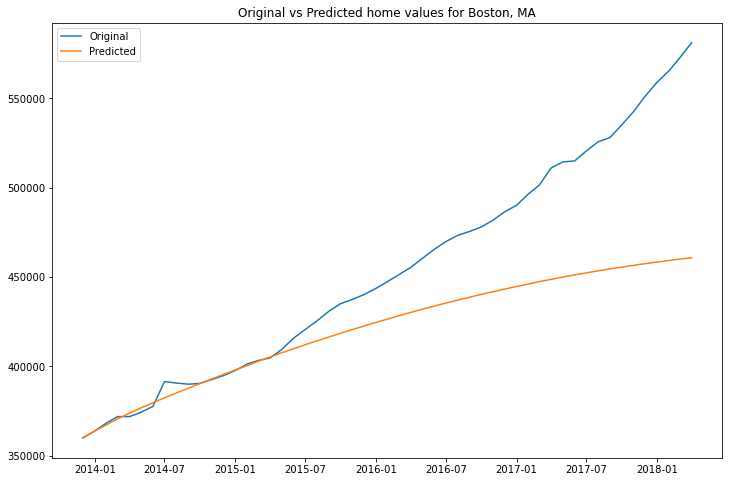

In [59]:
#3 useful graphs
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2,3,2)
    city_model.plot(test)

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1663.969
Date:                Fri, 13 May 2022   AIC                           3345.939
Time:                        10:31:47   BIC                           3375.977
Sample:                    04-01-1996   HQIC                          3358.084
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9334      0.077    -12.158      0.000      -1.084      -0.783
ar.L2          0.4920      0.095      5.178      0.000       0.306       0.678
ar.L3          0.4603      0.094      4.891      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -2014.212
Date:                Fri, 13 May 2022   AIC                           4046.424
Time:                        10:31:48   BIC                           4076.462
Sample:                    04-01-1996   HQIC                          4058.570
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6704      7.102     -0.094      0.925     -14.590      13.249
ar.L2         -0.4682      1.434     -0.326      0.744      -3.280       2.343
ar.L3         -1.0509      4.569     -0.230      0.8

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1994.800
Date:                Fri, 13 May 2022   AIC                           4007.599
Time:                        10:31:49   BIC                           4037.637
Sample:                    04-01-1996   HQIC                          4019.745
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9657      3.868     -0.508      0.611      -9.548       5.616
ar.L2         -1.6849      6.111     -0.276      0.783     -13.663      10.293
ar.L3         -0.5989      3.962     -0.151      0.8

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1742.321
Date:                Fri, 13 May 2022   AIC                           3502.641
Time:                        10:31:51   BIC                           3532.679
Sample:                    04-01-1996   HQIC                          3514.787
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5294      1.742     -0.304      0.761      -3.943       2.885
ar.L2         -0.3829      0.803     -0.477      0.634      -1.958       1.192
ar.L3         -0.7997      1.425     -0.561      0.5

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1604.346
Date:                Fri, 13 May 2022   AIC                           3226.692
Time:                        10:31:52   BIC                           3256.730
Sample:                    04-01-1996   HQIC                          3238.838
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1624      0.310     -3.744      0.000      -1.771      -0.554
ar.L2         -0.8725      0.130     -6.699      0.000      -1.128      -0.617
ar.L3         -0.1862      0.206     -0.902      0.3

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1965.983
Date:                Fri, 13 May 2022   AIC                           3949.966
Time:                        10:31:54   BIC                           3980.004
Sample:                    04-01-1996   HQIC                          3962.112
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.5911     27.795     -0.093      0.926     -57.068      51.886
ar.L2         -3.0339     51.030     -0.059      0.953    -103.050      96.982
ar.L3         -1.8407     46.792     -0.039      0.9

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           San Jose, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1915.752
Date:                Fri, 13 May 2022   AIC                           3849.504
Time:                        10:31:56   BIC                           3879.542
Sample:                    04-01-1996   HQIC                          3861.650
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4742     21.175      0.022      0.982     -41.028      41.977
ar.L2          0.6923     29.426      0.024      0.981     -56.982      58.366
ar.L3         -0.7780     12.229     -0.064      0.9

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1735.532
Date:                Fri, 13 May 2022   AIC                           3489.065
Time:                        10:31:57   BIC                           3519.103
Sample:                    04-01-1996   HQIC                          3501.211
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3495      0.078    -17.298      0.000      -1.502      -1.197
ar.L2          0.1896      0.113      1.671      0.095      -0.033       0.412
ar.L3          0.6805      0.122      5.593      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1625.463
Date:                Fri, 13 May 2022   AIC                           3268.926
Time:                        10:31:58   BIC                           3298.963
Sample:                    04-01-1996   HQIC                          3281.071
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1390      0.053    -21.661      0.000      -1.242      -1.036
ar.L2         -0.4861      0.095     -5.112      0.000      -0.673      -0.300
ar.L3          0.1534      0.095      1.613      0.1

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1779.110
Date:                Fri, 13 May 2022   AIC                           3576.220
Time:                        10:32:00   BIC                           3606.258
Sample:                    04-01-1996   HQIC                          3588.366
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4287      5.107     -0.280      0.780     -11.438       8.580
ar.L2         -1.4816      2.571     -0.576      0.564      -6.521       3.558
ar.L3         -1.1451      5.183     -0.221      0.8

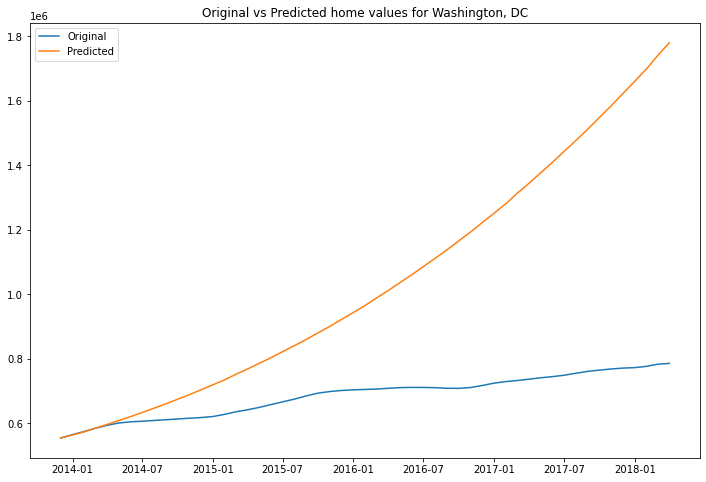

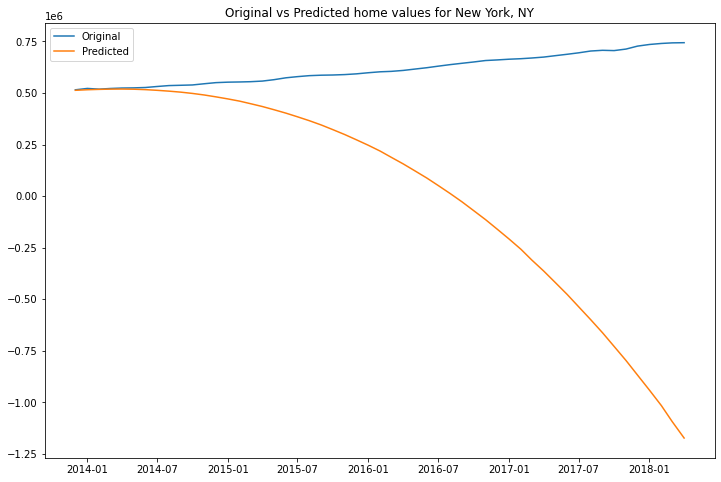

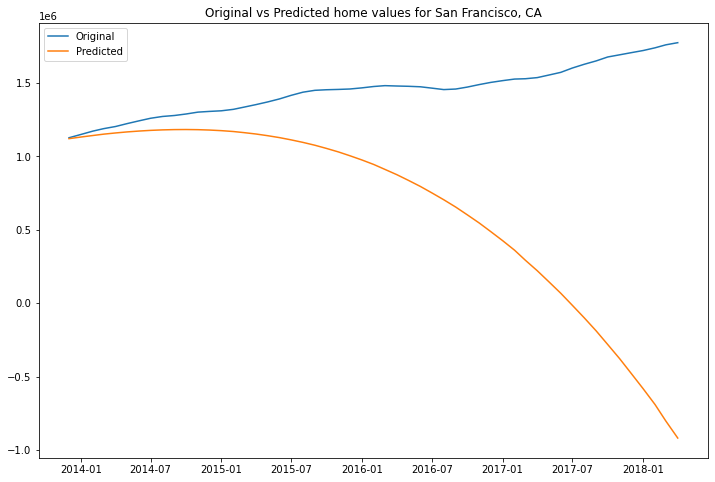

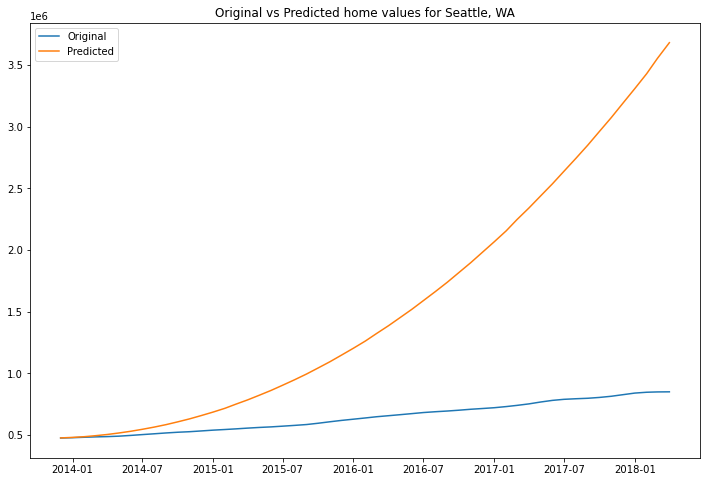

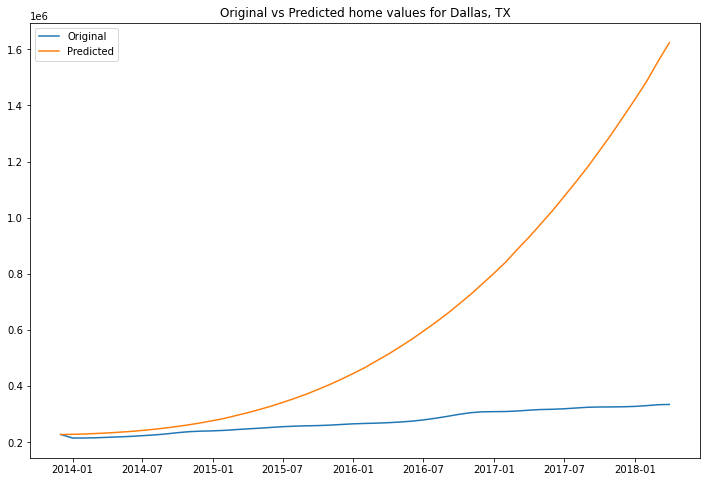

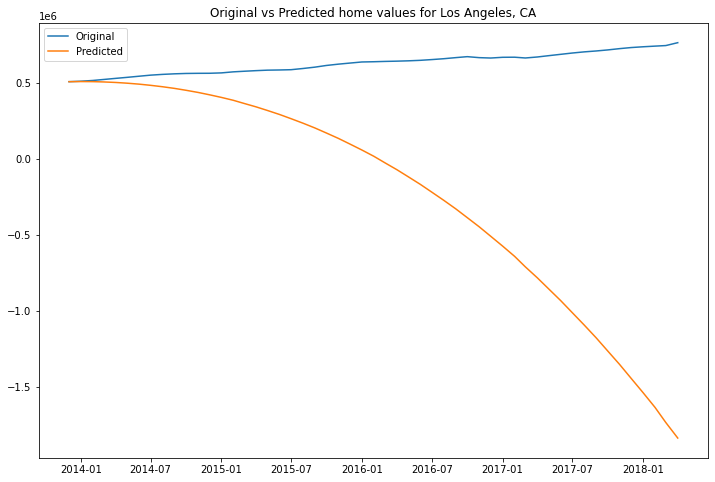

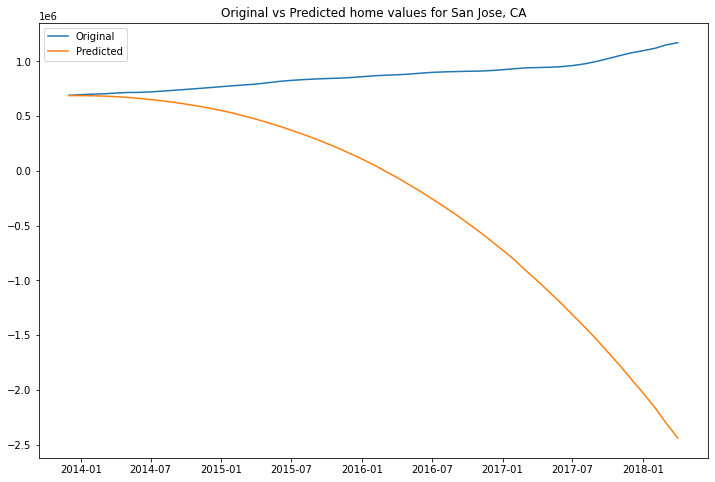

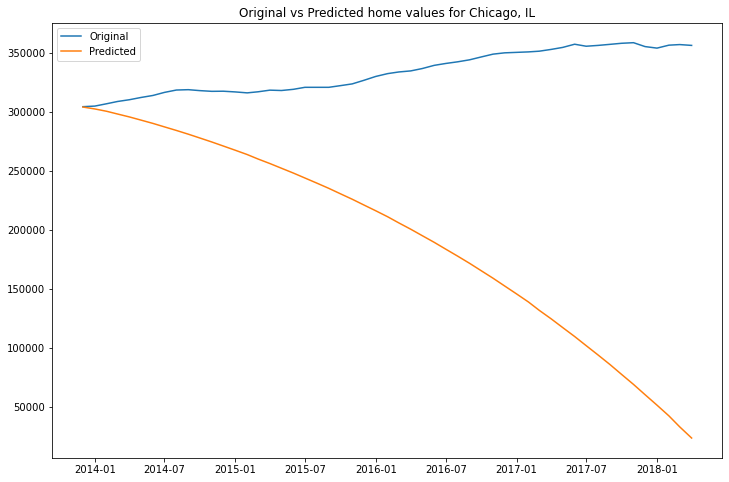

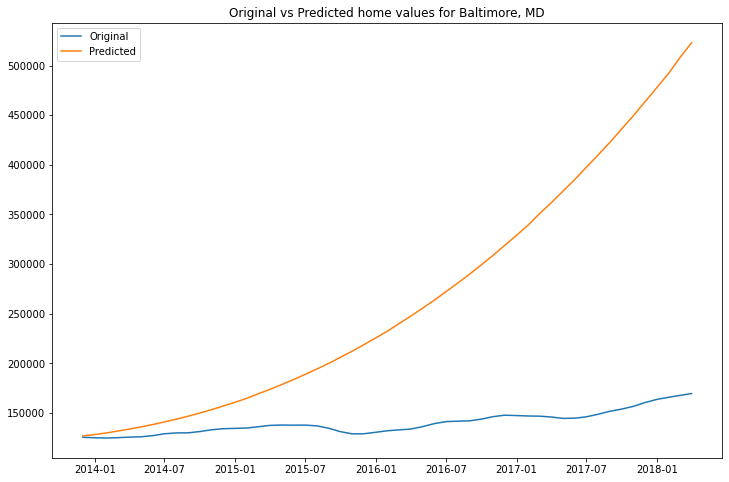

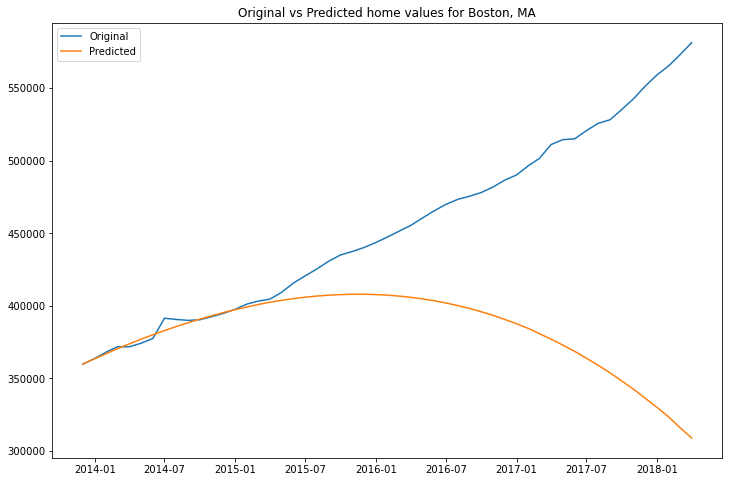

In [60]:
#not using this one
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 4,4,4)
    city_model.plot(test)

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1674.243
Date:                Fri, 13 May 2022   AIC                           3362.486
Time:                        10:32:03   BIC                           3385.883
Sample:                    04-01-1996   HQIC                          3371.945
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5944      2.015      0.295      0.768      -3.355       4.544
ar.L2          0.8708      3.122      0.279      0.780      -5.249       6.990
ar.L3         -0.6431      1.307     -0.492      0.6

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1967.267
Date:                Fri, 13 May 2022   AIC                           3948.534
Time:                        10:32:04   BIC                           3971.930
Sample:                    04-01-1996   HQIC                          3957.993
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5466      1.161     -1.332      0.183      -3.822       0.728
ar.L2         -0.9912      1.216     -0.815      0.415      -3.374       1.392
ar.L3         -0.0586      0.077     -0.760      0.4

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1544.184
Date:                Fri, 13 May 2022   AIC                           3102.367
Time:                        10:32:07   BIC                           3125.764
Sample:                    04-01-1996   HQIC                          3111.827
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2601      0.079      3.281      0.001       0.105       0.415
ar.L2         -0.2403      0.065     -3.700      0.000      -0.368      -0.113
ar.L3          0.8637      0.067     12.970      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1924.674
Date:                Fri, 13 May 2022   AIC                           3863.347
Time:                        10:32:08   BIC                           3886.743
Sample:                    04-01-1996   HQIC                          3872.806
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8042      5.084     -0.355      0.723     -11.769       8.161
ar.L2         -0.9808      4.885     -0.201      0.841     -10.556       8.594
ar.L3         -0.1015      0.582     -0.174      0.8

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1630.097
Date:                Fri, 13 May 2022   AIC                           3274.195
Time:                        10:32:11   BIC                           3297.591
Sample:                    04-01-1996   HQIC                          3283.654
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8056      0.281      2.865      0.004       0.254       1.357
ar.L2          0.0209      0.251      0.083      0.934      -0.471       0.513
ar.L3         -0.0874      0.107     -0.817      0.4

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1753.983
Date:                Fri, 13 May 2022   AIC                           3521.965
Time:                        10:32:12   BIC                           3545.361
Sample:                    04-01-1996   HQIC                          3531.424
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3990      0.114      3.501      0.000       0.176       0.622
ar.L2          0.8471      0.108      7.830      0.000       0.635       1.059
ar.L3         -0.5364      0.065     -8.201      0.0

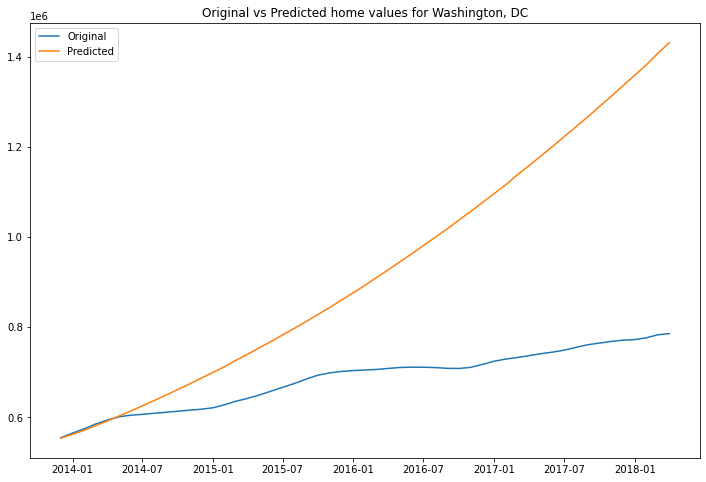

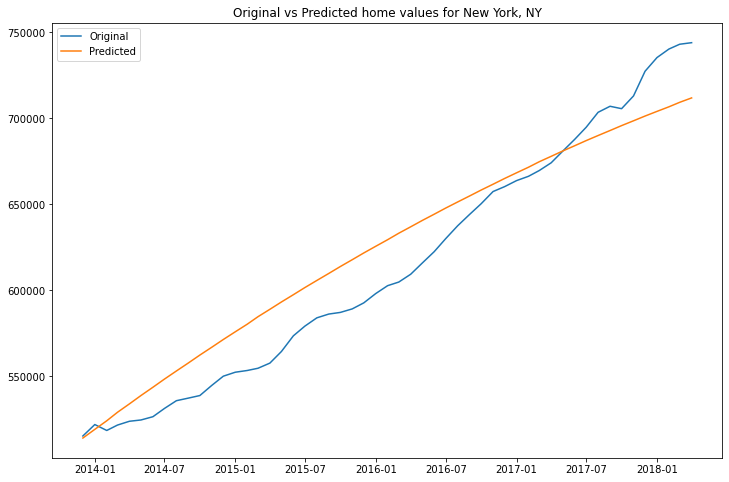

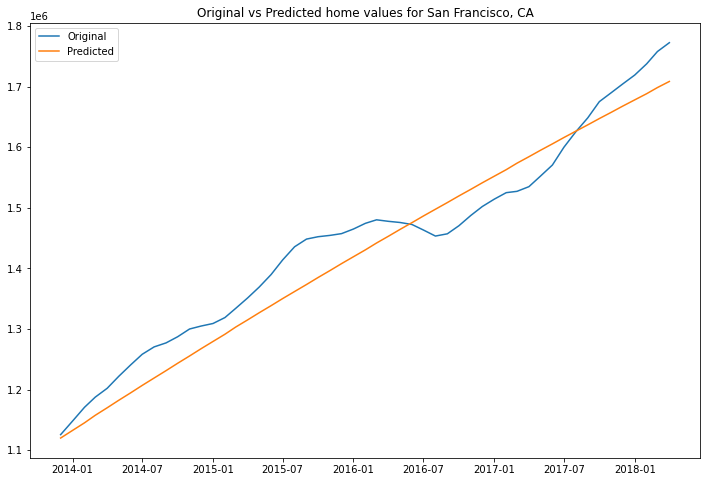

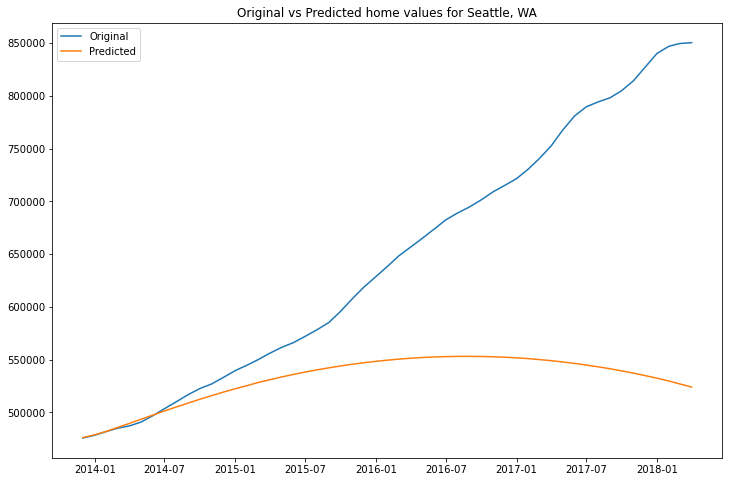

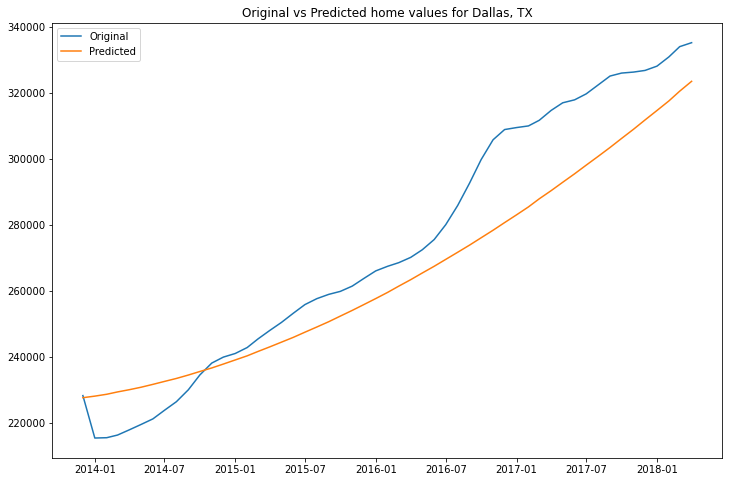

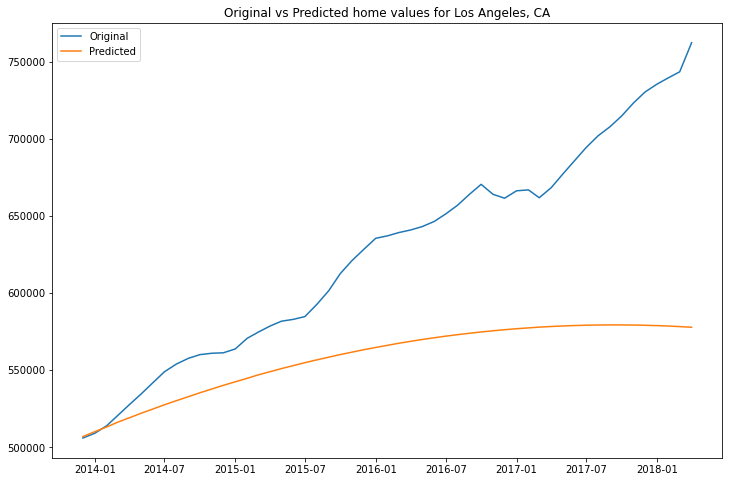

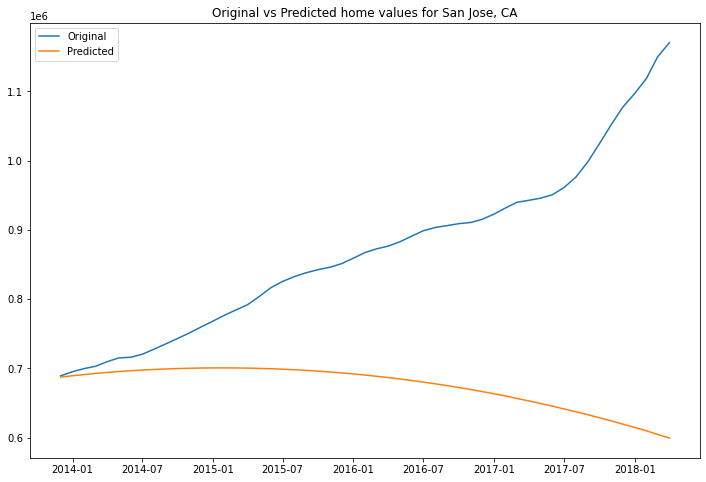

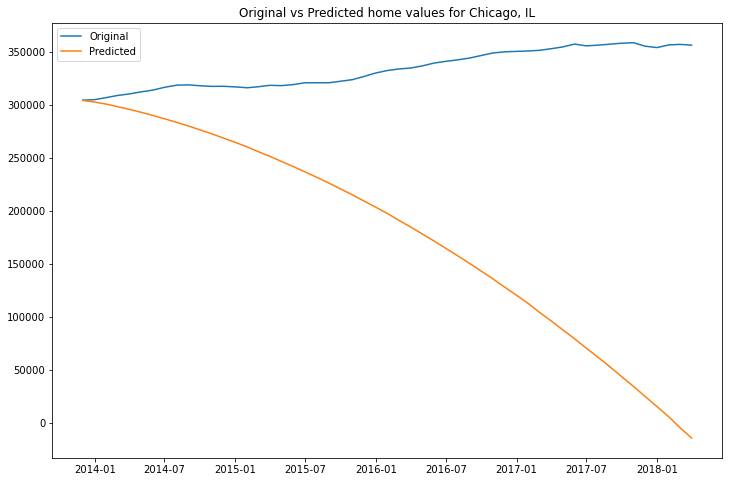

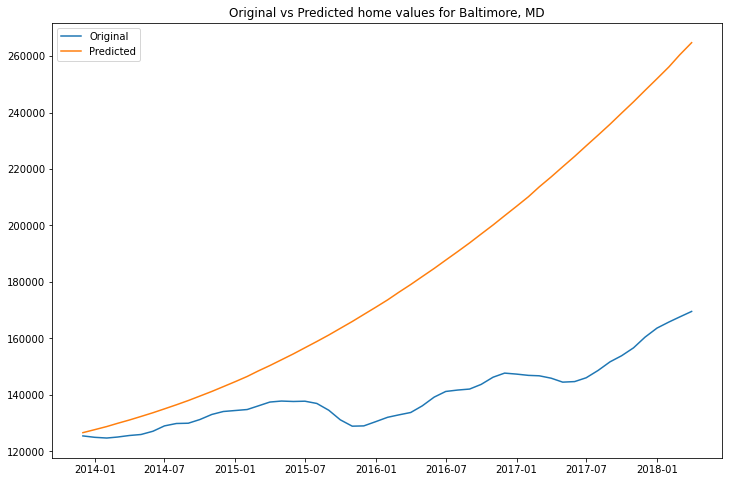

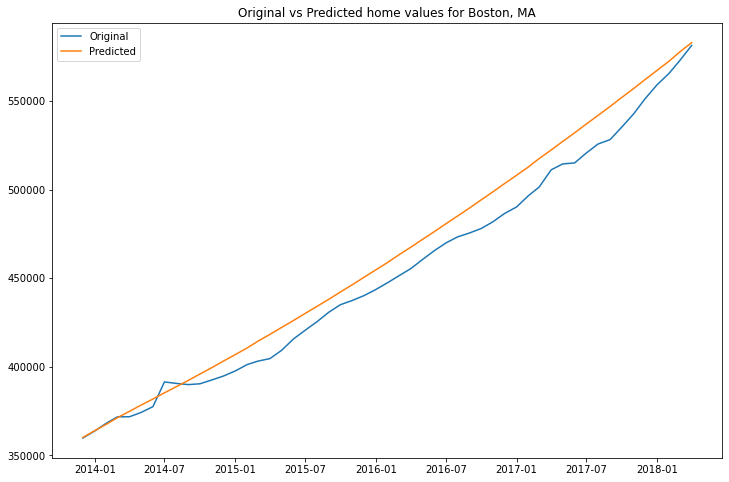

In [61]:
#4 useful graphs
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,3)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1672.969
Date:                Fri, 13 May 2022   AIC                           3361.939
Time:                        10:32:17   BIC                           3388.677
Sample:                    04-01-1996   HQIC                          3372.749
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3575      1.524     -0.235      0.814      -3.344       2.629
ar.L2          0.5706      0.238      2.400      0.016       0.105       1.037
ar.L3          0.0785      0.736      0.107      0.9

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1963.857
Date:                Fri, 13 May 2022   AIC                           3943.713
Time:                        10:32:18   BIC                           3970.452
Sample:                    04-01-1996   HQIC                          3954.524
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0361      0.173     -5.996      0.000      -1.375      -0.697
ar.L2         -1.0652      0.034    -31.431      0.000      -1.132      -0.999
ar.L3         -0.9628      0.173     -5.581      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1543.369
Date:                Fri, 13 May 2022   AIC                           3102.737
Time:                        10:32:21   BIC                           3129.476
Sample:                    04-01-1996   HQIC                          3113.548
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3201      0.511     -0.626      0.531      -1.322       0.682
ar.L2         -0.6332      0.384     -1.648      0.099      -1.386       0.120
ar.L3          0.3913      0.479      0.817      0.4

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1925.604
Date:                Fri, 13 May 2022   AIC                           3867.208
Time:                        10:32:22   BIC                           3893.947
Sample:                    04-01-1996   HQIC                          3878.019
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7274      1.498     -1.153      0.249      -4.663       1.208
ar.L2         -0.8808      1.655     -0.532      0.595      -4.125       2.363
ar.L3         -0.0403      0.221     -0.183      0.8

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1758.297
Date:                Fri, 13 May 2022   AIC                           3532.594
Time:                        10:32:24   BIC                           3559.333
Sample:                    04-01-1996   HQIC                          3543.405
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6888      0.189     -3.647      0.000      -1.059      -0.319
ar.L2         -0.3790      0.184     -2.062      0.039      -0.739      -0.019
ar.L3          0.4459      0.124      3.608      0.0

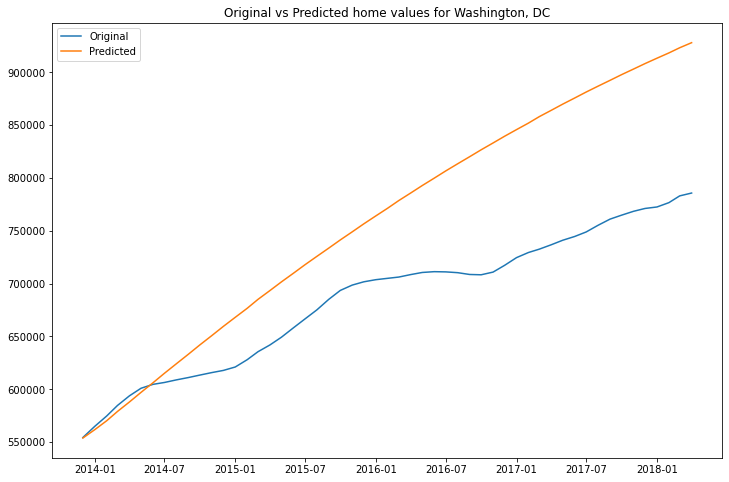

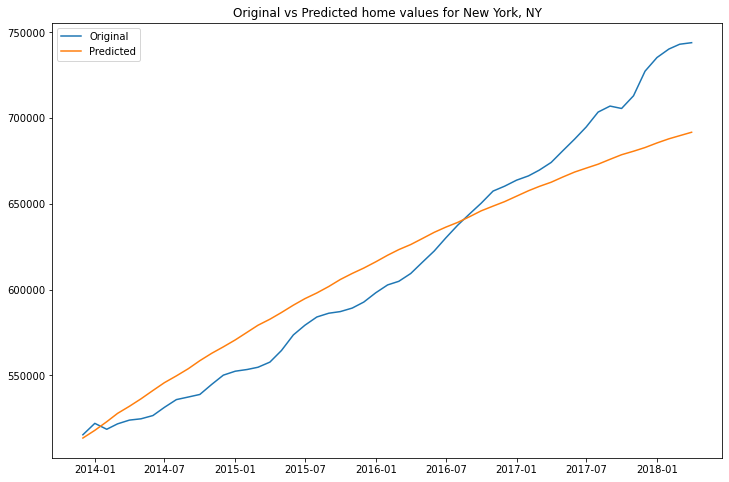

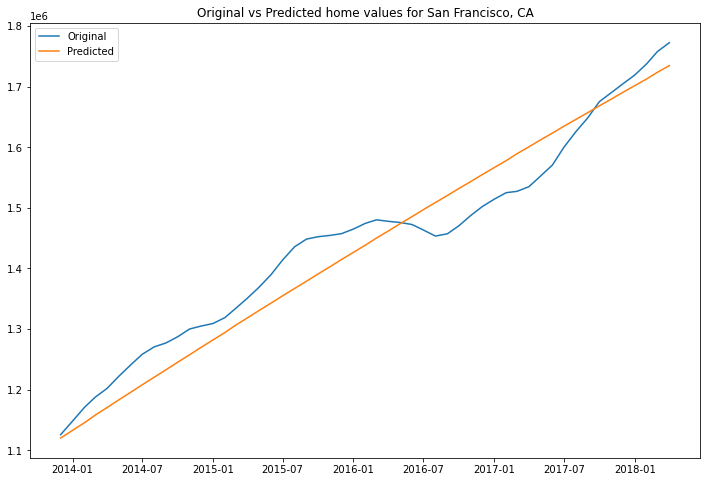

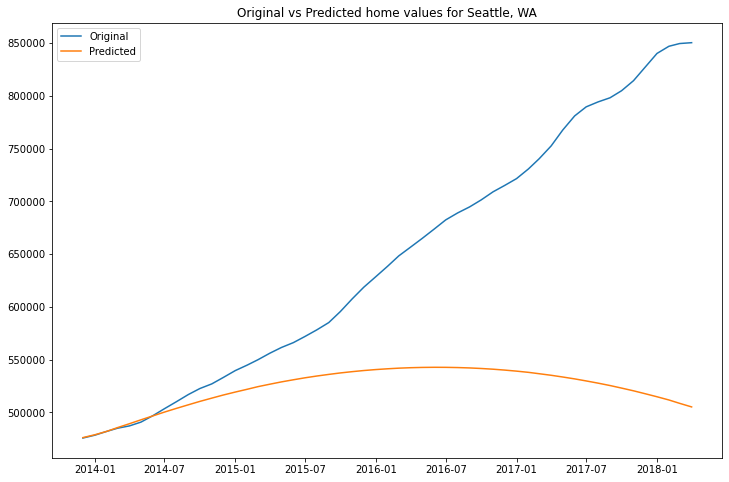

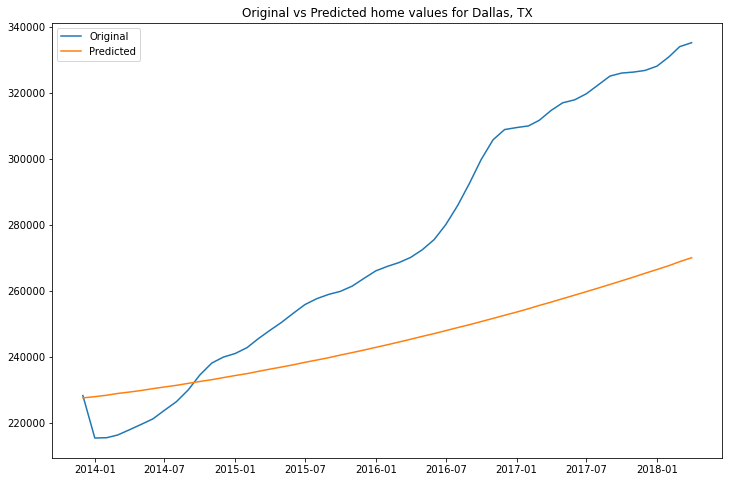

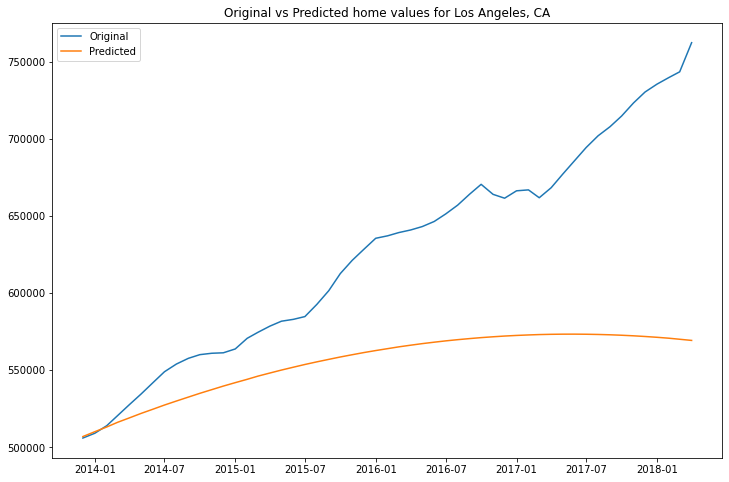

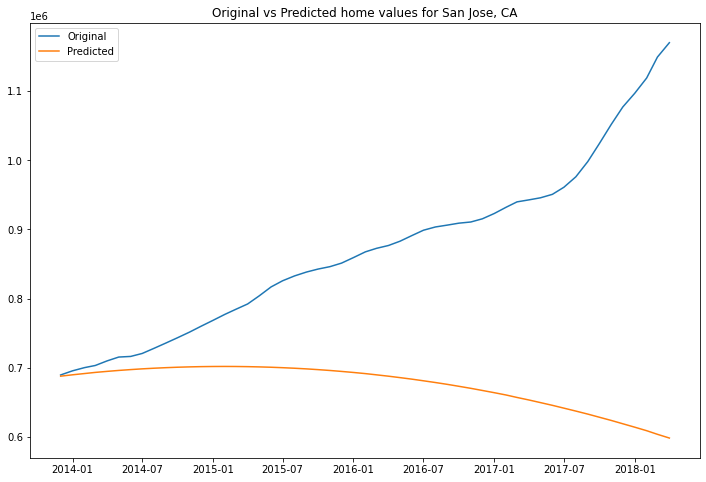

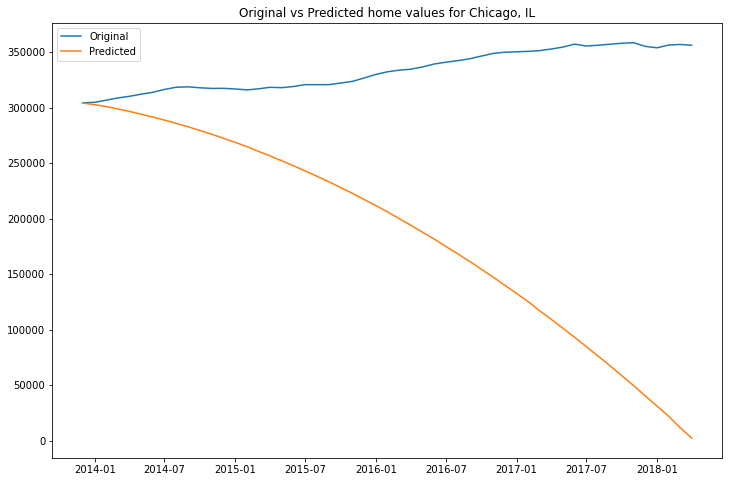

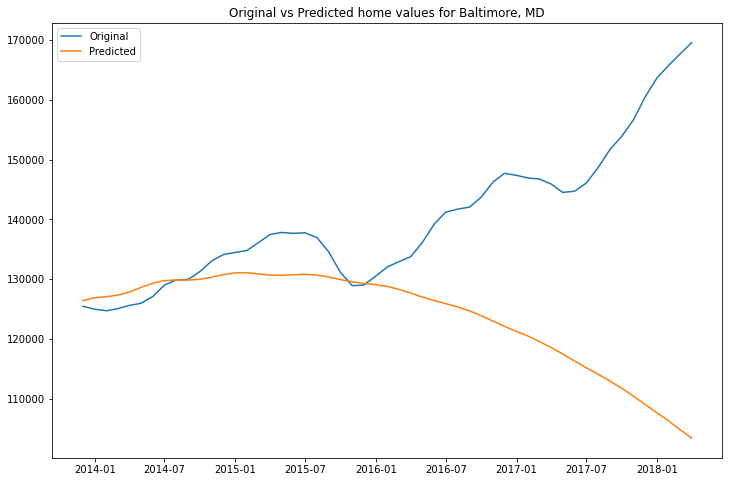

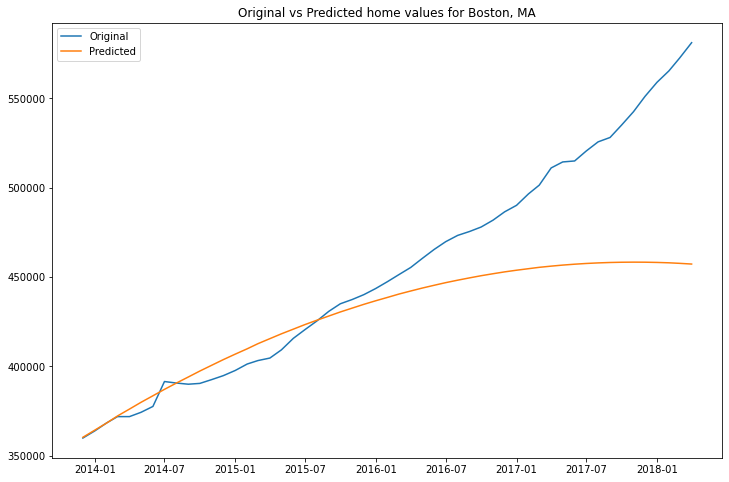

In [62]:
#3 good models
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,4)
    city_model.plot(test)

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1673.551
Date:                Fri, 13 May 2022   AIC                           3363.102
Time:                        10:32:28   BIC                           3389.841
Sample:                    04-01-1996   HQIC                          3373.913
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0867      0.469     -0.185      0.853      -1.005       0.832
ar.L2          0.3988      0.343      1.161      0.246      -0.274       1.072
ma.L1         -0.1038      0.469     -0.221      0.8

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1966.490
Date:                Fri, 13 May 2022   AIC                           3948.980
Time:                        10:32:28   BIC                           3975.719
Sample:                    04-01-1996   HQIC                          3959.791
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4661      0.832     -0.560      0.575      -2.097       1.165
ar.L2         -0.7662      0.795     -0.964      0.335      -2.323       0.791
ma.L1         -0.6147      0.837     -0.734      0.4

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1748.589
Date:                Fri, 13 May 2022   AIC                           3513.178
Time:                        10:32:31   BIC                           3539.916
Sample:                    04-01-1996   HQIC                          3523.988
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0360      0.148      0.244      0.807      -0.253       0.325
ar.L2         -0.8427      0.122     -6.901      0.000      -1.082      -0.603
ma.L1         -0.2640      0.151     -1.752      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1545.667
Date:                Fri, 13 May 2022   AIC                           3107.333
Time:                        10:32:31   BIC                           3134.072
Sample:                    04-01-1996   HQIC                          3118.144
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7041      0.051    -13.890      0.000      -0.803      -0.605
ar.L2         -0.8964      0.042    -21.209      0.000      -0.979      -0.814
ma.L1          0.6250      0.053     11.785      0.0

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1925.593
Date:                Fri, 13 May 2022   AIC                           3867.187
Time:                        10:32:32   BIC                           3893.926
Sample:                    04-01-1996   HQIC                          3877.998
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7061      0.895     -1.905      0.057      -3.461       0.049
ar.L2         -0.9243      0.888     -1.041      0.298      -2.665       0.816
ma.L1          0.5827      0.901      0.647      0.5

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1743.248
Date:                Fri, 13 May 2022   AIC                           3502.497
Time:                        10:32:34   BIC                           3529.236
Sample:                    04-01-1996   HQIC                          3513.308
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4069      0.311     -1.310      0.190      -1.016       0.202
ar.L2          0.4539      0.252      1.804      0.071      -0.039       0.947
ma.L1          0.0658      0.308      0.214      0.8

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1757.698
Date:                Fri, 13 May 2022   AIC                           3531.395
Time:                        10:32:37   BIC                           3558.134
Sample:                    04-01-1996   HQIC                          3542.206
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7885      0.694     -1.137      0.256      -2.148       0.571
ar.L2          0.0140      0.401      0.035      0.972      -0.771       0.799
ma.L1          0.3336      0.694      0.481      0.6

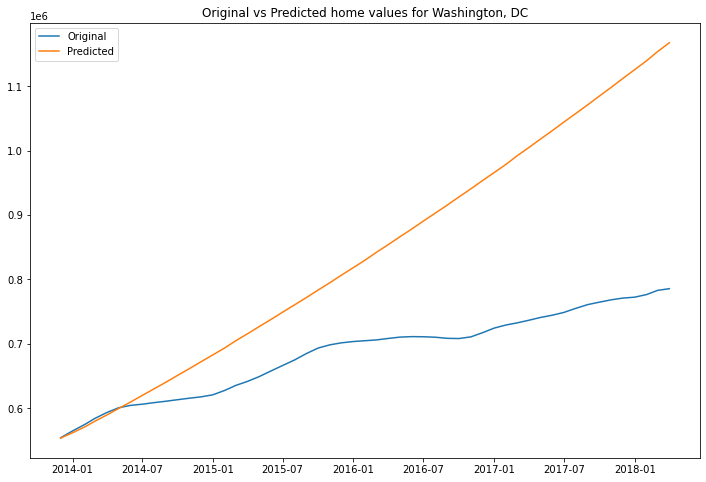

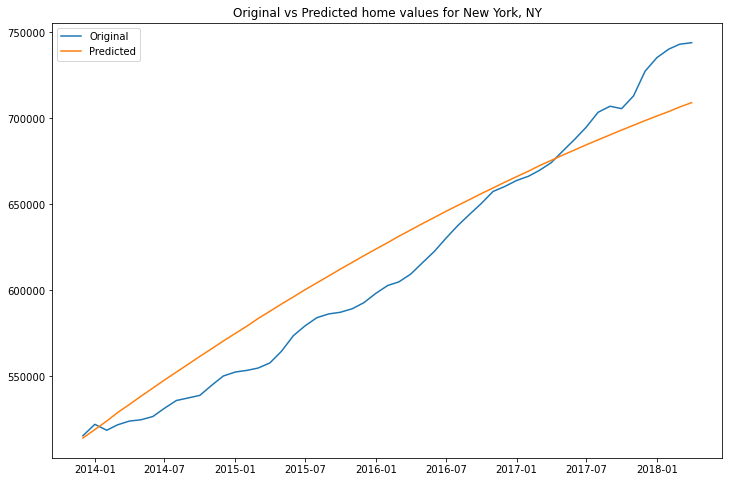

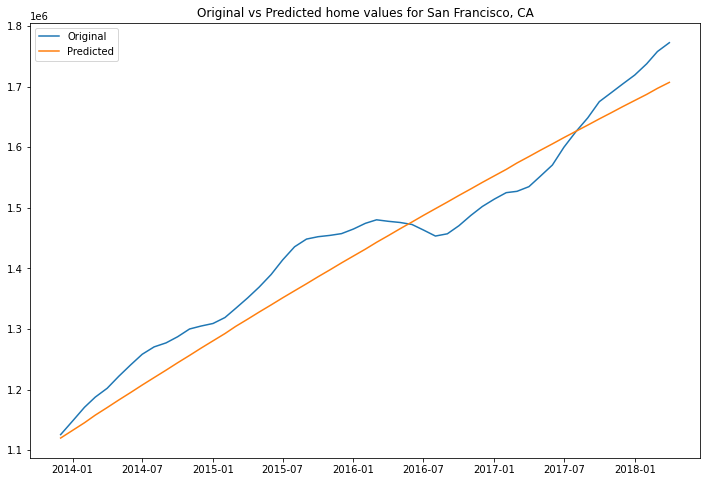

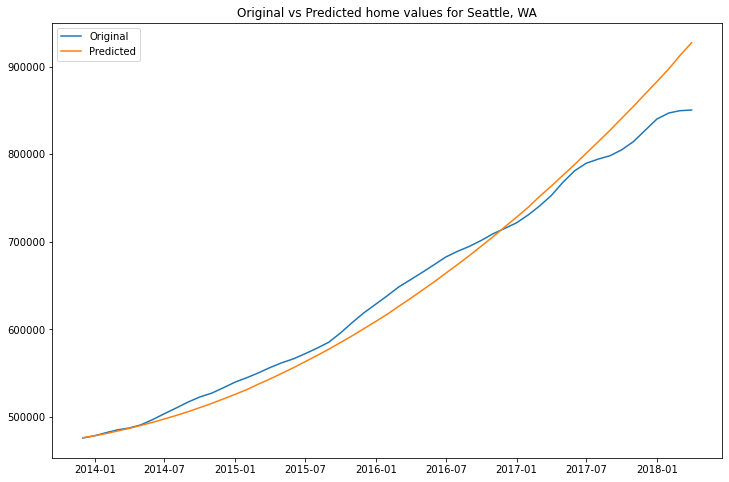

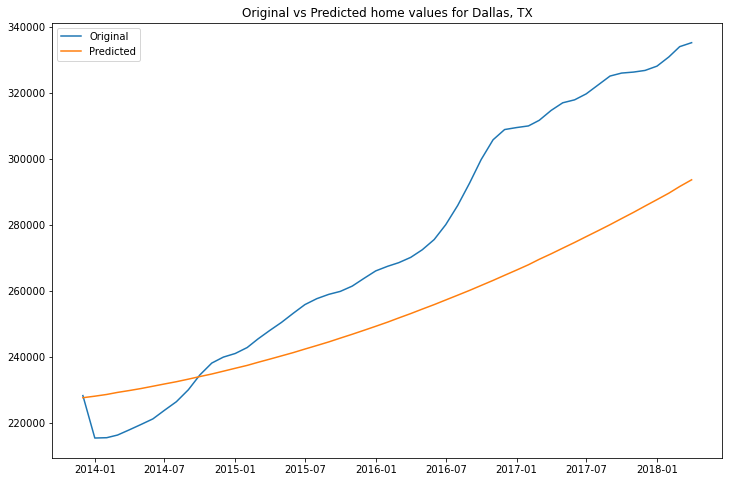

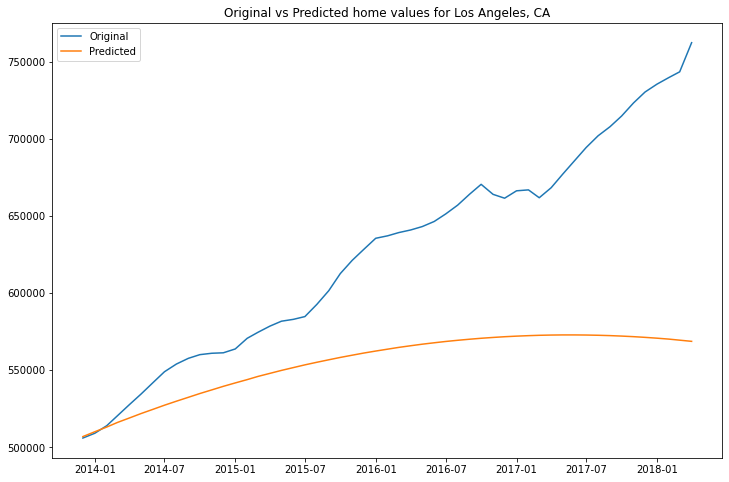

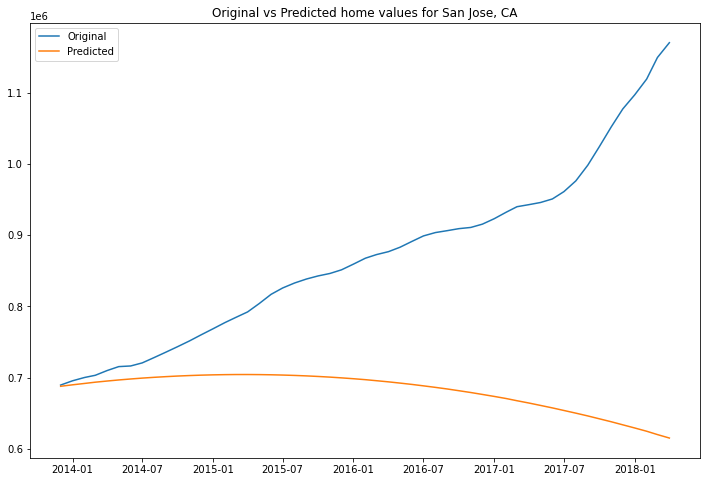

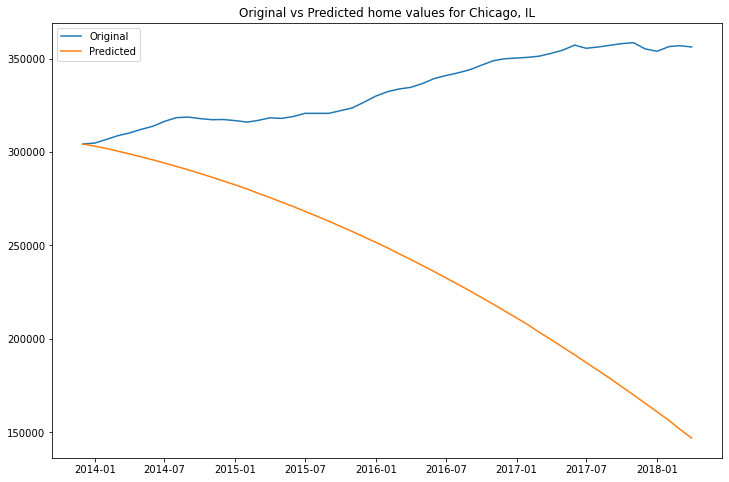

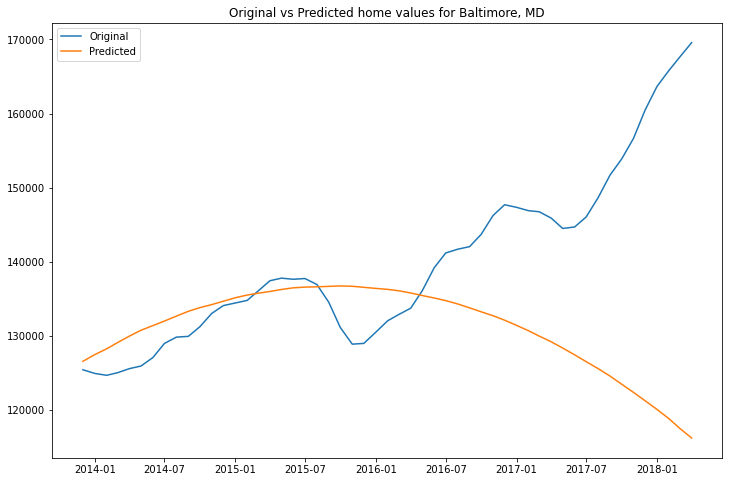

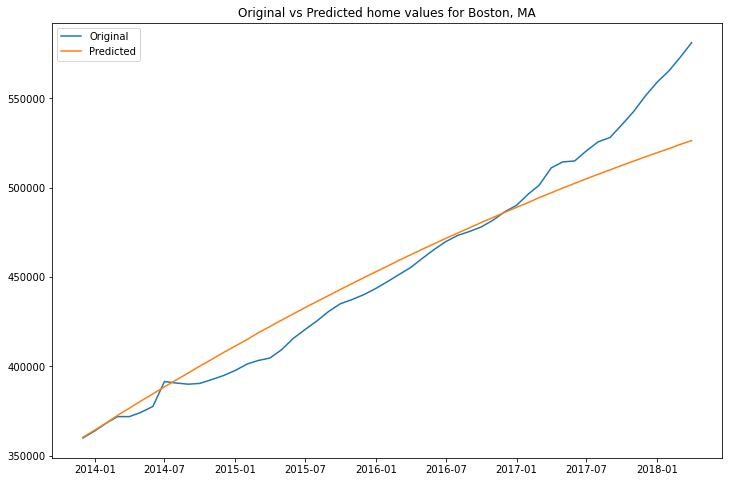

In [63]:
#Seattle works for this one.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2,3,5)
    city_model.plot(test)

### Forcasting home price with best model

In [64]:
forecast_mod = ARIMA(melted_df['Washington, DC'], order = [2,2,2]).fit()
forecasted_df = forecast_mod.forecast(steps=120)
forecasted_df

2018-05-01    7.882883e+05
2018-06-01    7.907845e+05
2018-07-01    7.932926e+05
2018-08-01    7.958065e+05
2018-09-01    7.983199e+05
2018-10-01    8.008326e+05
2018-11-01    8.033452e+05
2018-12-01    8.058580e+05
2019-01-01    8.083707e+05
2019-02-01    8.108834e+05
2019-03-01    8.133962e+05
2019-04-01    8.159089e+05
2019-05-01    8.184216e+05
2019-06-01    8.209344e+05
2019-07-01    8.234471e+05
2019-08-01    8.259598e+05
2019-09-01    8.284726e+05
2019-10-01    8.309853e+05
2019-11-01    8.334980e+05
2019-12-01    8.360108e+05
2020-01-01    8.385235e+05
2020-02-01    8.410362e+05
2020-03-01    8.435490e+05
2020-04-01    8.460617e+05
2020-05-01    8.485744e+05
2020-06-01    8.510872e+05
2020-07-01    8.535999e+05
2020-08-01    8.561126e+05
2020-09-01    8.586254e+05
2020-10-01    8.611381e+05
2020-11-01    8.636508e+05
2020-12-01    8.661636e+05
2021-01-01    8.686763e+05
2021-02-01    8.711890e+05
2021-03-01    8.737018e+05
2021-04-01    8.762145e+05
2021-05-01    8.787272e+05
2

Text(0.5, 1.0, 'Forecasted home values for Washington, DC')

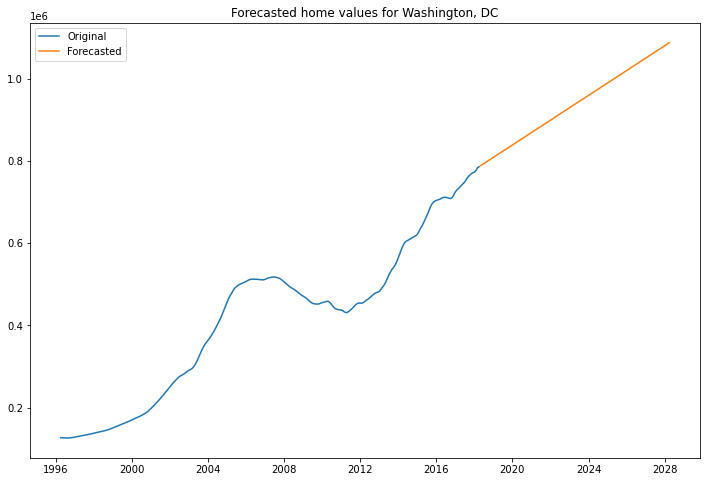

In [65]:
fig, ax = plt.subplots(figsize = (12,8)) 
ax.plot(melted_df['Washington, DC'])
ax.plot(forecasted_df)
ax.legend(['Original', 'Forecasted'])
ax.set_title(f'Forecasted home values for Washington, DC')

In [66]:
#We created an empty dictionary for our predictions 

predictions_dict = {}

#We are running a for-loop where we add the forecast to the dictionary, for every city.
for city in city_list: 
    forecast_mod = ARIMA(melted_df[city], order = [3,2,2]).fit()
    predictions_dict[city] = forecast_mod.forecast(steps=36)
    
predictions_dict    

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/jordan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



{'Washington, DC': 2018-05-01    788270.159844
 2018-06-01    790837.294903
 2018-07-01    793495.646716
 2018-08-01    796272.657062
 2018-09-01    799186.815505
 2018-10-01    802247.541415
 2018-11-01    805455.169129
 2018-12-01    808801.440851
 2019-01-01    812270.472025
 2019-02-01    815840.107423
 2019-03-01    819483.566905
 2019-04-01    823171.268500
 2019-05-01    826872.712445
 2019-06-01    830558.312794
 2019-07-01    834201.072657
 2019-08-01    837778.014098
 2019-09-01    841271.293037
 2019-10-01    844668.951825
 2019-11-01    847965.285946
 2019-12-01    851160.825146
 2020-01-01    854261.951801
 2020-02-01    857280.199184
 2020-03-01    860231.288608
 2020-04-01    863133.976313
 2020-05-01    866008.788115
 2020-06-01    868876.721952
 2020-07-01    871757.995885
 2020-08-01    874670.912031
 2020-09-01    877630.896233
 2020-10-01    880649.759614
 2020-11-01    883735.212624
 2020-12-01    886890.645752
 2021-01-01    890115.174681
 2021-02-01    893403.932

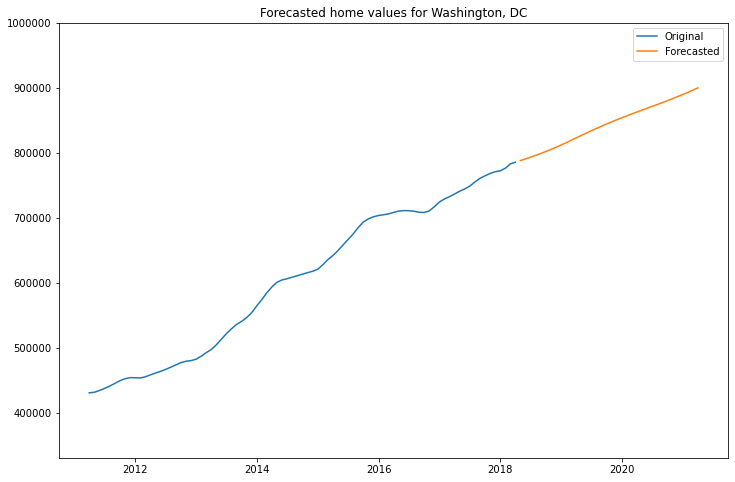

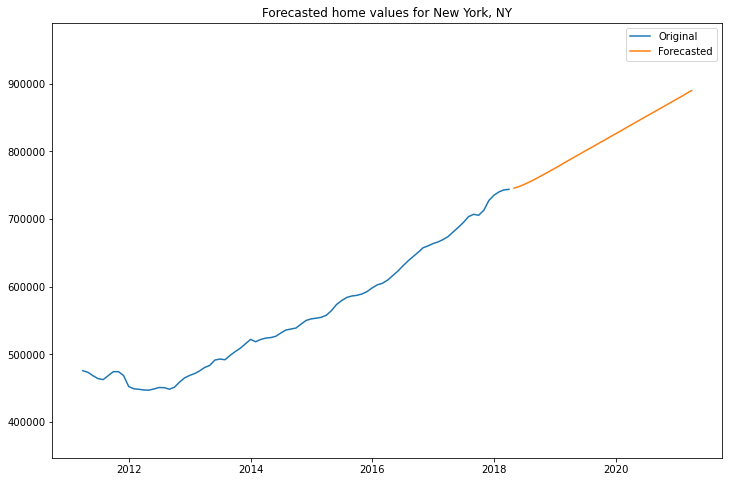

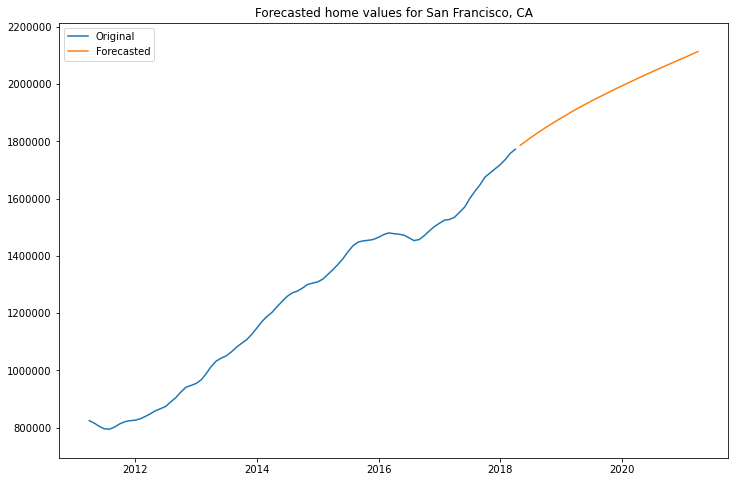

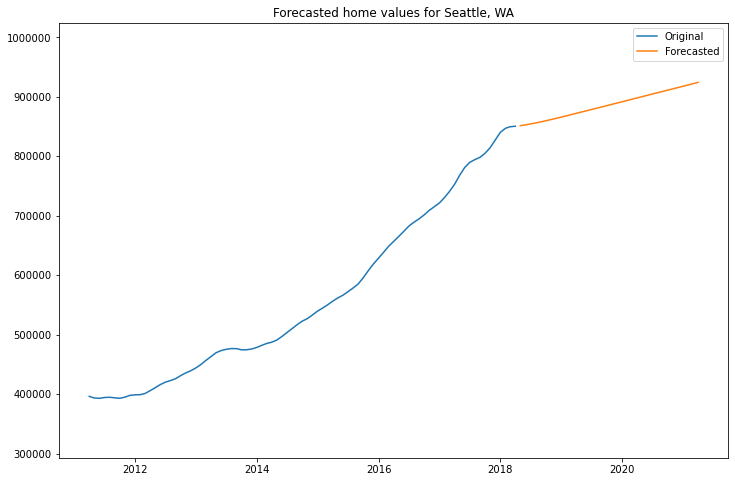

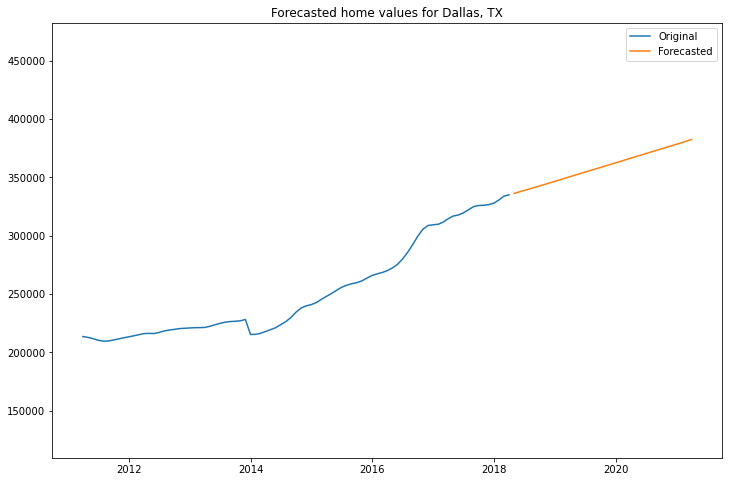

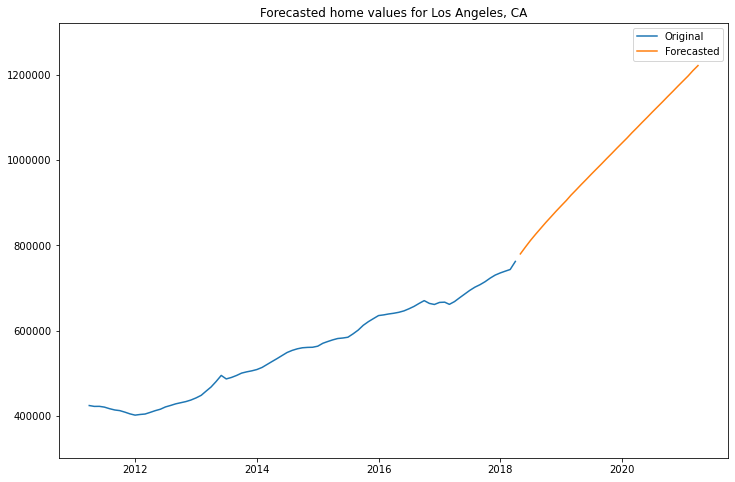

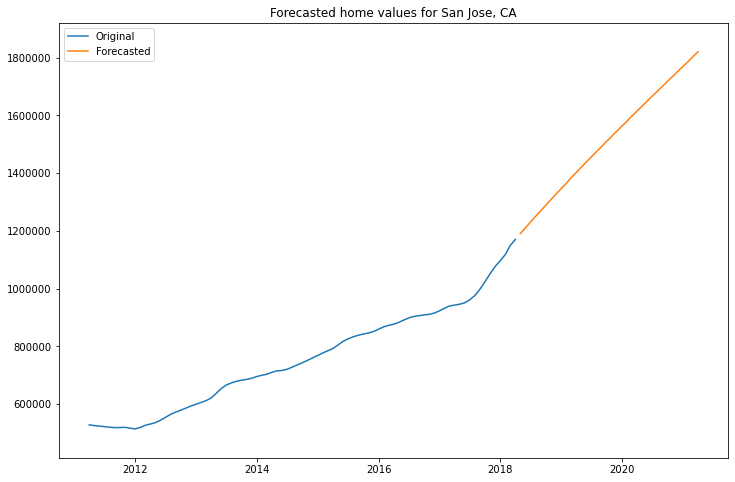

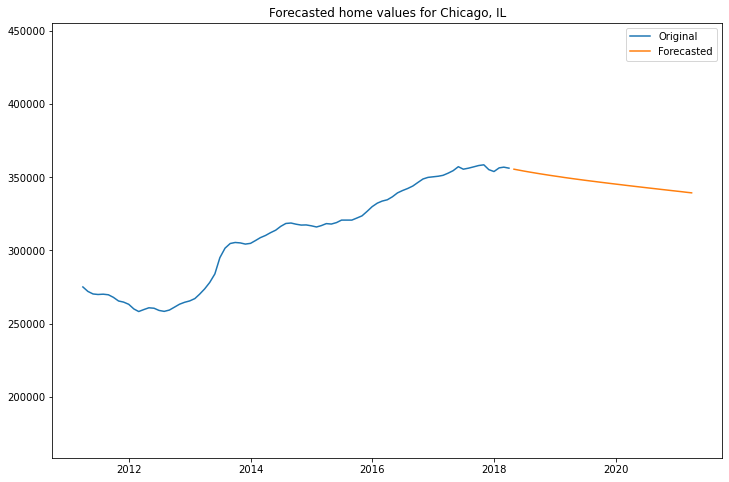

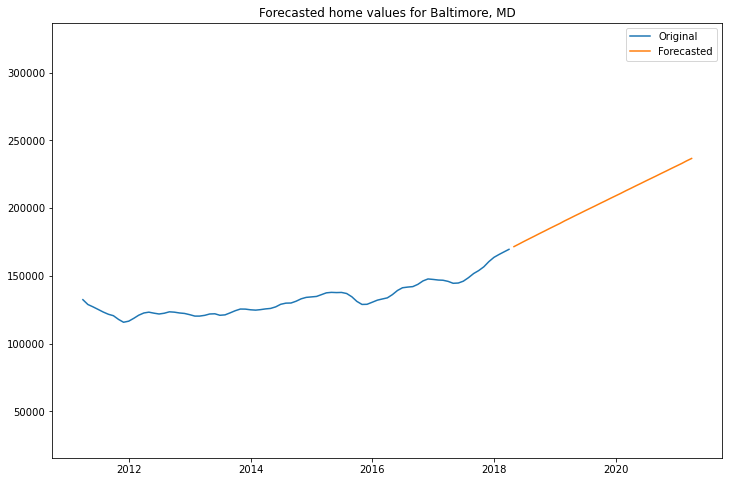

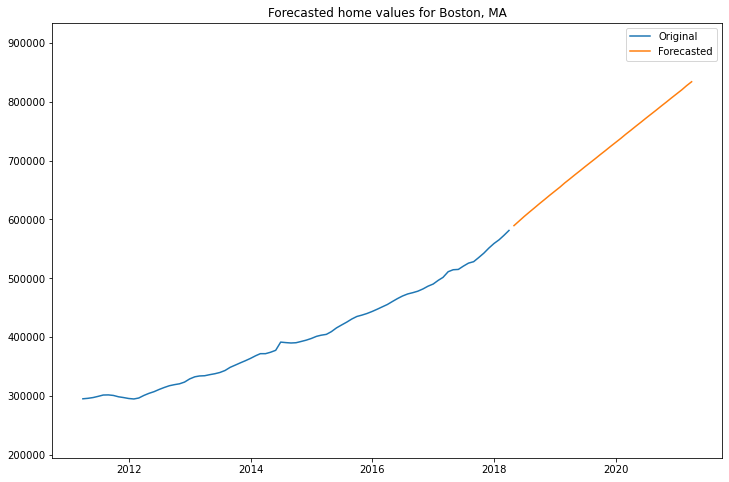

In [67]:
#We made a for loop that creates a graph that makes a prediction on home prices.


for city, predictions in predictions_dict.items():
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(melted_df[180:][city])
    ax.plot(predictions)
    ax.legend(['Original', 'Forecasted'])
    ax.set_title(f'Forecasted home values for {city}')
    ax.ticklabel_format(axis='y',style='plain')
    ax.set_ylim([min(melted_df[180:][city]-100000),max(predictions)+100000])
    plt.show()


Let's calculate the forcasted return for the next 3 year.

In [68]:
forcasted_return = {}
for city in city_list:
    forcast_return = ((predictions_dict[city][-1]/melted_df[city][-1])*100) -100
    forcasted_return[city]=forcast_return
    
forcasted_return = pd.DataFrame.from_dict(forcasted_return, orient='index')
forcasted_return.reset_index(inplace=True)
forcasted_return.rename({0:'Percent Return in 3 years','index':'City'},inplace=True, axis=1)
forcasted_return

City  Percent Return in 3 years
0     Washington, DC                  14.557808
1       New York, NY                  19.629672
2  San Francisco, CA                  19.261102
3        Seattle, WA                   8.674578
4         Dallas, TX                  14.137001
5    Los Angeles, CA                  60.205684
6       San Jose, CA                  55.574191
7        Chicago, IL                  -4.735584
8      Baltimore, MD                  39.545055
9         Boston, MA                  43.485599

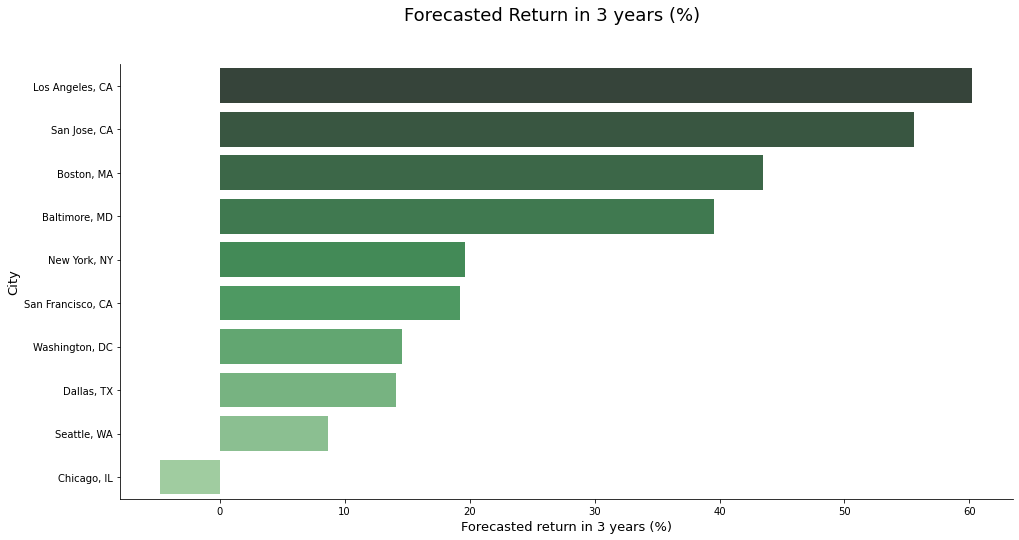

In [69]:
fig, ax = plt.subplots(figsize=(16,8))
forcasted_sort = forcasted_return.sort_values('Percent Return in 3 years',ascending = False)
# sns.set_palette("crest")

pal = sns.color_palette("Greens_d", len(forcasted_sort))
# rank = forcasted_sort.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sns.barplot(x='Percent Return in 3 years', y='City', data=forcasted_sort,palette=np.array(pal[::-1]))
sns.despine()
fig.suptitle("Forecasted Return in 3 years (%)", fontsize = 18)
ax.set_xlabel("Forecasted return in 3 years (%)", fontsize = 13)
ax.set_ylabel("City", fontsize = 13)
plt.savefig('figures/forecast_return.png', transparent=True,bbox_inches="tight", dpi=500)
plt.savefig('figures/forecast_return.jpeg', transparent=True,bbox_inches="tight", dpi=500)

Based on our forcast results, the top 5 cities that we would recommend investing in would be...

## Conclusion